# Question 4
Can we predict future crop yields based on current and historical data on pesticide use, temperature, and precipitation? 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Pre-process Surface Air Temperature Data

In [2]:
temp1 = pd.read_excel('Surface Air Temperature_1950-2014.xlsx')
temp2 = pd.read_excel('Surface Air Temp_2015-2100.xlsx')

temp = pd.merge(temp1, temp2, on=['code', 'name'], how = 'outer')

temperature = pd.melt(temp, id_vars=['code', 'name'], var_name='Year', value_name='Surface Air Temperature(\u00B0C)')

temperature['Year'] = temperature['Year'].str.split('-').str[0].astype(int)
temperature.rename(columns={'name': 'Country Name'}, inplace = True)
temperature

,code,Country Name,Year,Surface Air Temperature(°C)
0,ABW,Aruba (Neth.),1950,26.28
1,AFG,Afghanistan,1950,11.73
2,AGO,Angola,1950,22.08
3,AIA,Anguilla (U.K.),1950,25.62
4,ALA,Finland,1950,5.83
...,...,...,...,...
37141,WSM,Samoa,2100,26.18
37142,YEM,Republic of Yemen,2100,26.29
37143,ZAF,South Africa,2100,19.24
37144,ZMB,Zambia,2100,23.29


In [3]:
duplicate_rows = temperature[temperature.duplicated(['Year','Country Name'], keep=False)]
duplicate_rows
duplicate_rows.to_csv('duplicate_temperature_rows.csv', index=False)
print(duplicate_rows['Country Name'].unique())

['Finland' 'China' 'France']


In [4]:
temperature.loc[temperature['code'] == 'TWN', 'Country Name'] = 'Taiwan' #separate Taiwan and China
temperature = temperature[~((temperature['Country Name'] == 'France') & (temperature['code'] != 'FRA'))] #only take into account Frnace homeland
temperature.drop('code', axis = 1, inplace = True)
temperature = temperature.groupby(['Country Name', 'Year']).agg({'Surface Air Temperature(\u00B0C)': 'mean'}).reset_index() #average of Finland 

C:\Users\yhcsa\AppData\Local\Temp\ipykernel_20672\2330566639.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temperature.drop('code', axis = 1, inplace = True)


In [5]:
duplicate_rows = temperature[temperature.duplicated(['Year','Country Name'], keep=False)]
duplicate_rows
print(duplicate_rows['Country Name'].unique())

[]


In [6]:
temperature

,Country Name,Year,Surface Air Temperature(°C)
0,Afghanistan,1950,11.73
1,Afghanistan,1951,11.64
2,Afghanistan,1952,11.41
3,Afghanistan,1953,11.28
4,Afghanistan,1954,11.46
...,...,...,...
36235,Zimbabwe,2096,22.55
36236,Zimbabwe,2097,22.53
36237,Zimbabwe,2098,22.62
36238,Zimbabwe,2099,22.66


## Pre-process Precipitation Data

In [7]:
precp1 = pd.read_excel('Precipitation_1950-2014.xlsx')
precp2 = pd.read_excel('Precipitation_2015-2100.xlsx')

precp = pd.merge(precp1, precp2, on=['code', 'name'])

precipitation = pd.melt(precp, id_vars=['code', 'name'], var_name='Year', value_name='Precipitation(mm)')

precipitation['Year'] = precipitation['Year'].str.split('-').str[0].astype(int)
precipitation.rename(columns={'name': 'Country Name'}, inplace = True)
precipitation

,code,Country Name,Year,Precipitation(mm)
0,ABW,Aruba (Neth.),1950,643.76
1,AFG,Afghanistan,1950,330.14
2,AGO,Angola,1950,1159.02
3,AIA,Anguilla (U.K.),1950,817.35
4,ALA,Finland,1950,626.54
...,...,...,...,...
37141,WSM,Samoa,2100,2532.00
37142,YEM,Republic of Yemen,2100,165.47
37143,ZAF,South Africa,2100,532.08
37144,ZMB,Zambia,2100,1092.30


In [8]:
duplicate_rows = precipitation[precipitation.duplicated(['Year','Country Name'], keep=False)]
duplicate_rows
duplicate_rows.to_csv('duplicate_precipitation_rows.csv', index=False)
print(duplicate_rows['Country Name'].unique())

['Finland' 'China' 'France']


In [9]:
precipitation.loc[precipitation['code'] == 'TWN', 'Country Name'] = 'Taiwan' #separate Taiwan and China
precipitation = precipitation[~((precipitation['Country Name'] == 'France') & (precipitation['code'] != 'FRA'))] #only take into account Frnace homeland
precipitation.drop('code', axis = 1, inplace = True)
precipitation = precipitation.groupby(['Country Name', 'Year']).agg({'Precipitation(mm)': 'mean'}).reset_index() #average of Finland

C:\Users\yhcsa\AppData\Local\Temp\ipykernel_20672\2983207208.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precipitation.drop('code', axis = 1, inplace = True)


In [10]:
duplicate_rows = precipitation[precipitation.duplicated(['Year','Country Name'], keep=False)]
duplicate_rows
print(duplicate_rows['Country Name'].unique())

[]


In [11]:
precipitation

,Country Name,Year,Precipitation(mm)
0,Afghanistan,1950,330.14
1,Afghanistan,1951,339.61
2,Afghanistan,1952,375.65
3,Afghanistan,1953,359.84
4,Afghanistan,1954,365.87
...,...,...,...
36235,Zimbabwe,2096,697.64
36236,Zimbabwe,2097,692.86
36237,Zimbabwe,2098,688.45
36238,Zimbabwe,2099,697.02


## Pre-process Pesticide Use Data

In [12]:
pesticide = pd.read_csv('pesticides.csv')

pesticide.drop(['Domain', 'Element', 'Item', 'Unit'], axis=1, inplace=True)
pesticide.rename(columns={'Area': 'Country Name', 'Value': 'Pesticide Used(tn)'}, inplace = True)
pesticide

,Country Name,Year,Pesticide Used(tn)
0,Albania,1990,121.00
1,Albania,1991,121.00
2,Albania,1992,121.00
3,Albania,1993,121.00
4,Albania,1994,201.00
...,...,...,...
4344,Zimbabwe,2012,3375.53
4345,Zimbabwe,2013,2550.07
4346,Zimbabwe,2014,2185.07
4347,Zimbabwe,2015,2185.07


## Pre-process Crop Yield Data

In [13]:
crop_yield = pd.read_csv('All Types of Crop Yield.csv')

crop_abundance = crop_yield[[col for col in crop_yield.columns if col not in ['country', 'year']]].isnull().sum().sort_values().index.tolist()
print(crop_abundance)
cleaned_crop_yield = crop_yield[['country','year', 'pulses_yield', 'maize_yield', 'sugar_crops_yield', 'tobacco_yield', 'rice_yield', 'wheat_yield']]
cleaned_crop_yield.rename(columns={'country': 'Country Name', 'year': 'Year'}, inplace = True)
cleaned_crop_yield.isnull().sum()/cleaned_crop_yield.shape[0]

['vegetables_yield', 'roots_and_tubers_yield', 'fruit_yield', 'other_vegetables__fresh_n_e_c__yield', 'oilcrops__oil_equivalent_yield', 'oilcrops__cake_equivalent_yield', 'cereal_yield', 'pulses_yield', 'maize_yield', 'tomato_yield', 'potato_yield', 'sugar_crops_yield', 'tobacco_yield', 'other_fruits__n_e_c__yield', 'cabbages_yield', 'onions_yield', 'citrus_fruit_yield', 'banana_yield', 'rice_yield', 'fibre_crops__fibre_equivalent_yield', 'wheat_yield', 'bean_yield', 'sweet_potatoes_yield', 'groundnut_yield', 'cucumbers_and_gherkins_yield', 'orange_yield', 'carrots_and_turnips_yield', 'sorghum_yield', 'sugarcane_yield', 'chillies_and_peppers__green__capsicum_spp__and_pimenta_spp__yield', 'other_pulses_n_e_c__yield', 'watermelons_yield', 'pumpkins__squash_and_gourds_yield', 'cassava_yield', 'barley_yield', 'cotton_yield', 'treenuts_yield', 'beans__green_yield', 'lemons_and_limes_yield', 'lettuce_yield', 'pea_yield', 'melon_yield', 'potato_attainable_yield', 'soybean_yield', 'grapes_yiel

C:\Users\yhcsa\AppData\Local\Temp\ipykernel_20672\2302818644.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_crop_yield.rename(columns={'country': 'Country Name', 'year': 'Year'}, inplace = True)


Country Name         0.000000
Year                 0.000000
pulses_yield         0.148041
maize_yield          0.171023
sugar_crops_yield    0.258009
tobacco_yield        0.305961
rice_yield           0.339576
wheat_yield          0.352061
dtype: float64

In [14]:
cleaned_crop_yield

,Country Name,Year,pulses_yield,maize_yield,sugar_crops_yield,tobacco_yield,rice_yield,wheat_yield
0,Afghanistan,1961,0.8780,1.4000,16.3762,NaN,1.5190,1.0220
1,Afghanistan,1962,0.8857,1.4000,19.5289,NaN,1.5190,0.9735
2,Afghanistan,1963,0.8711,1.4260,18.7454,NaN,1.5190,0.8317
3,Afghanistan,1964,0.9156,1.4257,14.3396,NaN,1.7273,0.9510
4,Afghanistan,1965,0.9042,1.4400,17.8333,NaN,1.7273,0.9723
...,...,...,...,...,...,...,...,...
14572,Zimbabwe,2018,0.4105,1.3506,79.6221,1.7587,0.4025,2.7178
14573,Zimbabwe,2019,0.2716,0.7807,77.4348,1.9002,0.4484,3.9149
14574,Zimbabwe,2020,0.3570,1.1801,75.3994,1.9424,0.6114,4.7796
14575,Zimbabwe,2021,0.3730,1.5344,73.4043,1.6396,0.8390,5.0759


## Merge all datasets into one cleaned dataset for Predictive Modelling 

In [15]:
# merge to pesticide first as it has the shortest time frame from 1990 to 2016
merged_data = pd.merge(pesticide, temperature, on=['Country Name', 'Year'], how='left') 
merged_data = pd.merge(merged_data, precipitation, on=['Country Name', 'Year'], how='left')
merged_data = pd.merge(merged_data, cleaned_crop_yield, on=['Country Name', 'Year'], how='left')

#show the ratio of NaN value in each columns/factors
merged_data.isnull().sum()/merged_data.shape[0]

Country Name                   0.000000
Year                           0.000000
Pesticide Used(tn)             0.000000
Surface Air Temperature(°C)    0.157737
Precipitation(mm)              0.157737
pulses_yield                   0.221660
maize_yield                    0.266038
sugar_crops_yield              0.358703
tobacco_yield                  0.424235
rice_yield                     0.484709
wheat_yield                    0.396873
dtype: float64

In [16]:
# display the merged data
merged_data

,Country Name,Year,Pesticide Used(tn),Surface Air Temperature(°C),Precipitation(mm),pulses_yield,maize_yield,sugar_crops_yield,tobacco_yield,rice_yield,wheat_yield
0,Albania,1990,121.00,12.30,1229.55,0.5890,3.6613,28.166698,0.5875,2.3333,3.0197
1,Albania,1991,121.00,12.03,1287.92,0.7009,2.9068,12.888900,0.6364,2.8538,2.0698
2,Albania,1992,121.00,11.58,1319.90,1.0269,2.4876,12.908600,0.9727,4.0000,2.4388
3,Albania,1993,121.00,11.79,1278.50,0.9618,2.4185,12.143499,1.0362,4.1786,2.9976
4,Albania,1994,201.00,12.14,1284.35,0.7495,2.5848,28.776999,0.6002,NaN,2.4745
...,...,...,...,...,...,...,...,...,...,...,...
4344,Zimbabwe,2012,3375.53,21.82,685.75,0.3877,0.7912,73.459496,1.5013,0.3791,2.4902
4345,Zimbabwe,2013,2550.07,22.02,655.18,0.3755,0.7449,84.969400,1.1698,0.3999,2.3430
4346,Zimbabwe,2014,2185.07,21.91,688.39,0.3459,0.9301,89.422800,1.4301,0.3426,2.2150
4347,Zimbabwe,2015,2185.07,21.95,714.71,0.3111,0.5803,77.690600,1.2948,0.3065,2.0486


In [17]:
# Look for country names in which it has NaN precipitation values in precipitation column
# Upon some observation, some values are missing due to un-standardized country name across different dataset
merged_data[merged_data['Precipitation(mm)'].isna()]['Country Name'].unique()

array(['Bahamas', 'Belgium-Luxembourg', 'Bermuda',
       'Bolivia (Plurinational State of)', 'China, Hong Kong SAR',
       'China, Macao SAR', 'China, mainland', 'China, Taiwan Province of',
       'Cook Islands', 'Czechia', 'Egypt', 'French Polynesia', 'Gambia',
       'Iran (Islamic Republic of)', 'Kyrgyzstan', 'New Caledonia',
       'Occupied Palestinian Territory', 'Republic of Moldova',
       'Serbia and Montenegro', 'Slovakia', 'Sudan (former)',
       'The former Yugoslav Republic of Macedonia', 'Turkey',
       'United Republic of Tanzania', 'USSR',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Yemen',
       'Yugoslav SFR'], dtype=object)

In [18]:
# Standardize country names across all datasets
country_mapping = {
    'The Bahamas': 'Bahamas',
    'Belgium-Luxembourg':'Luxembourg',
    'Bermuda (U.K.)':'Bermuda',
    'Bolivia (Plurinational State of)': 'Bolivia',
    'China, Hong Kong SAR':'Hong Kong, SAR',
    'China, Taiwan Province of': 'Taiwan',
    'Cook Islands (N.Z.)': 'Cook Islands',
    'Czechia':'Czech Republic',
    'Arab Republic of Egypt':'Egypt',
    'The Gambia':'Gambia',
    'Iran (Islamic Republic of)':'Islamic Republic of Iran',
    'Kyrgyz Republic':'Kyrgyzstan',
    'New Caledonia (Fr.)':'New Caledonia',
    'Republic of Moldova':'Moldova',
    'Serbia and Montenegro':'Serbia',
    'Slovak Republic':'Slovakia',
    'Sudan (former)':'Sudan',
    'The former Yugoslav Republic of Macedonia':'North Macedonia',
    'Türkiye':'Turkey',
    'United Republic of Tanzania':'Tanzania',
    'Venezuela (Bolivarian Republic of)':'Venezuela',
    'R. B. de Venezuela':'Venezuela',
    'Viet Nam':'Vietnam',
    'Republic of Yemen':'Yemen',
    'China, mainland':'China',
    'Brunei':'Brunei Darussalam',
    'Cape Verde':'Cabo Verde',
    'Hong Kong' : 'Hong Kong, SAR',
    "Cote d'Ivoire":"CÃ´te d'Ivoire",
    'Iran':'Islamic Republic of Iran',
    'Laos':"Lao People's Democratic Republic",
    'South Korea':'Republic of Korea',
    'Russia':'Russian Federation',
    'Syria':'Syrian Arab Republic',
    'East Timor':'Timor-Leste',
    'United States':'United States of America'
}

def standardize_country_names(df, country_col, mapping):
    df[country_col] = df[country_col].replace(mapping)
    return df

temperature = standardize_country_names(temperature, 'Country Name', country_mapping)
precipitation = standardize_country_names(precipitation, 'Country Name', country_mapping)
pesticide = standardize_country_names(pesticide, 'Country Name', country_mapping)
cleaned_crop_yield = standardize_country_names(cleaned_crop_yield, 'Country Name', country_mapping)

C:\Users\yhcsa\AppData\Local\Temp\ipykernel_20672\3910896477.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[country_col] = df[country_col].replace(mapping)


In [19]:
# merge the data again 
# show the percentage of NaN values again, significant decrease of NaN ratio in all columns
merged_data = pd.merge(pesticide, temperature, on=['Country Name', 'Year'], how='left')
merged_data = pd.merge(merged_data, precipitation, on=['Country Name', 'Year'], how='left')
merged_data = pd.merge(merged_data, cleaned_crop_yield, on=['Country Name', 'Year'], how='left')

merged_data.isnull().sum()/merged_data.shape[0]

Country Name                   0.000000
Year                           0.000000
Pesticide Used(tn)             0.000000
Surface Air Temperature(°C)    0.019545
Precipitation(mm)              0.019545
pulses_yield                   0.123707
maize_yield                    0.168085
sugar_crops_yield              0.273166
tobacco_yield                  0.339158
rice_yield                     0.392504
wheat_yield                    0.323753
dtype: float64

In [20]:
# show the country name with NaN values in precipitation column for checking again 
# These countries are deemed insignificant or do not exist anymore
merged_data[merged_data['Precipitation(mm)'].isna()]['Country Name'].unique()

array(['China, Macao SAR', 'French Polynesia',
       'Occupied Palestinian Territory', 'USSR', 'Yugoslav SFR'],
      dtype=object)

In [21]:
# rows with these country names are removed
merged_cleaned_data = merged_data.dropna(subset=['Precipitation(mm)'])
merged_cleaned_data 

,Country Name,Year,Pesticide Used(tn),Surface Air Temperature(°C),Precipitation(mm),pulses_yield,maize_yield,sugar_crops_yield,tobacco_yield,rice_yield,wheat_yield
0,Albania,1990,121.00,12.30,1229.55,0.5890,3.6613,28.166698,0.5875,2.3333,3.0197
1,Albania,1991,121.00,12.03,1287.92,0.7009,2.9068,12.888900,0.6364,2.8538,2.0698
2,Albania,1992,121.00,11.58,1319.90,1.0269,2.4876,12.908600,0.9727,4.0000,2.4388
3,Albania,1993,121.00,11.79,1278.50,0.9618,2.4185,12.143499,1.0362,4.1786,2.9976
4,Albania,1994,201.00,12.14,1284.35,0.7495,2.5848,28.776999,0.6002,NaN,2.4745
...,...,...,...,...,...,...,...,...,...,...,...
4344,Zimbabwe,2012,3375.53,21.82,685.75,0.3877,0.7912,73.459496,1.5013,0.3791,2.4902
4345,Zimbabwe,2013,2550.07,22.02,655.18,0.3755,0.7449,84.969400,1.1698,0.3999,2.3430
4346,Zimbabwe,2014,2185.07,21.91,688.39,0.3459,0.9301,89.422800,1.4301,0.3426,2.2150
4347,Zimbabwe,2015,2185.07,21.95,714.71,0.3111,0.5803,77.690600,1.2948,0.3065,2.0486


In [22]:
# checking the ratio of NaN values in the merged and cleaned data
# No NaN values in the independent variables 
merged_cleaned_data.isnull().sum()/merged_data.shape[0]

Country Name                   0.000000
Year                           0.000000
Pesticide Used(tn)             0.000000
Surface Air Temperature(°C)    0.000000
Precipitation(mm)              0.000000
pulses_yield                   0.104622
maize_yield                    0.149000
sugar_crops_yield              0.260290
tobacco_yield                  0.320074
rice_yield                     0.373419
wheat_yield                    0.304668
dtype: float64

In [23]:
# export merged and clened data to a csv for more detailed inspection on the crop yield
merged_cleaned_data.to_csv('merged_cleaned_data.csv', index=False)

In [24]:
# these countries do not have agriculutural activities on the prior selecetd crop types
# removed
merged_cleaned_data = merged_cleaned_data[~merged_cleaned_data['Country Name'].isin(['Bermuda', 'Cook Islands', "Côte d'Ivoire", 'Iceland', 'Seychelles', 'Tonga'])]
merged_cleaned_data

,Country Name,Year,Pesticide Used(tn),Surface Air Temperature(°C),Precipitation(mm),pulses_yield,maize_yield,sugar_crops_yield,tobacco_yield,rice_yield,wheat_yield
0,Albania,1990,121.00,12.30,1229.55,0.5890,3.6613,28.166698,0.5875,2.3333,3.0197
1,Albania,1991,121.00,12.03,1287.92,0.7009,2.9068,12.888900,0.6364,2.8538,2.0698
2,Albania,1992,121.00,11.58,1319.90,1.0269,2.4876,12.908600,0.9727,4.0000,2.4388
3,Albania,1993,121.00,11.79,1278.50,0.9618,2.4185,12.143499,1.0362,4.1786,2.9976
4,Albania,1994,201.00,12.14,1284.35,0.7495,2.5848,28.776999,0.6002,NaN,2.4745
...,...,...,...,...,...,...,...,...,...,...,...
4344,Zimbabwe,2012,3375.53,21.82,685.75,0.3877,0.7912,73.459496,1.5013,0.3791,2.4902
4345,Zimbabwe,2013,2550.07,22.02,655.18,0.3755,0.7449,84.969400,1.1698,0.3999,2.3430
4346,Zimbabwe,2014,2185.07,21.91,688.39,0.3459,0.9301,89.422800,1.4301,0.3426,2.2150
4347,Zimbabwe,2015,2185.07,21.95,714.71,0.3111,0.5803,77.690600,1.2948,0.3065,2.0486


In [25]:
# check the ratio of NaN values in the crop yield columns
# significant decrease in NaN values
merged_cleaned_data.isnull().sum()/merged_cleaned_data.shape[0]

Country Name                   0.000000
Year                           0.000000
Pesticide Used(tn)             0.000000
Surface Air Temperature(°C)    0.000000
Precipitation(mm)              0.000000
pulses_yield                   0.071429
maize_yield                    0.118479
sugar_crops_yield              0.236470
tobacco_yield                  0.299854
rice_yield                     0.356412
wheat_yield                    0.283520
dtype: float64

In [26]:
# save the final cleaned and merged data to a csv
merged_cleaned_data.to_csv('merged_cleaned_data.csv', index=False)

# Categorize countries based on their climate zone

In [27]:
import requests
from bs4 import BeautifulSoup

# URL of the website
url = 'https://weatherandclimate.com/countries'

# Send a GET request to the website
response = requests.get(url)

# Parse the HTML content of the page
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table containing the country and climate zone data
table = soup.find('table')

# Extract the table headers
headers = []
for th in table.find_all('th'):
    headers.append(th.text.strip())

# Extract the table rows
rows = []
for tr in table.find_all('tr'):
    cells = tr.find_all('td')
    if len(cells) > 0:
        row = [cell.text.strip() for cell in cells]
        rows.append(row)

# Create a DataFrame from the extracted data
df = pd.DataFrame(rows, columns=headers)

# Save the DataFrame to a CSV file
df.to_csv('countries_climate_zones.csv', index=False)

In [28]:
climate_zone = pd.read_csv('countries_climate_zones.csv')
climate_zone

,Country,Climate zone,Avg °F,Avg °C
0,Afghanistan,DSB,60.26,15.70
1,Albania,CSB,59.31,15.17
2,Algeria,BWH,68.00,20.00
3,American Samoa,AW,82.40,28.00
4,Andorra,CFB,44.91,7.17
...,...,...,...,...
241,Wallis and Futuna,AF,82.63,28.13
242,Western Sahara,BWH,80.13,26.74
243,Yemen,BWH,77.95,25.53
244,Zambia,CWA,73.99,23.33


In [29]:
climate_zone = climate_zone.rename(columns={'Country': 'Country Name'})

country_mapping['Democratic Republic of the Congo'] = 'Congo'
climate_zone = standardize_country_names(climate_zone, 'Country Name', country_mapping)

In [30]:
# Merge datasetA with datasetB on the 'country' column
merged_cleaned_data = pd.merge(merged_cleaned_data, climate_zone[['Country Name', 'Climate zone']],  on='Country Name', how='left')

In [31]:
merged_cleaned_data.loc[merged_cleaned_data['Climate zone'].isnull(), 'Country Name'].unique()

array([], dtype=object)

In [32]:
merged_cleaned_data

,Country Name,Year,Pesticide Used(tn),Surface Air Temperature(°C),Precipitation(mm),pulses_yield,maize_yield,sugar_crops_yield,tobacco_yield,rice_yield,wheat_yield,Climate zone
0,Albania,1990,121.00,12.30,1229.55,0.5890,3.6613,28.166698,0.5875,2.3333,3.0197,CSB
1,Albania,1991,121.00,12.03,1287.92,0.7009,2.9068,12.888900,0.6364,2.8538,2.0698,CSB
2,Albania,1992,121.00,11.58,1319.90,1.0269,2.4876,12.908600,0.9727,4.0000,2.4388,CSB
3,Albania,1993,121.00,11.79,1278.50,0.9618,2.4185,12.143499,1.0362,4.1786,2.9976,CSB
4,Albania,1994,201.00,12.14,1284.35,0.7495,2.5848,28.776999,0.6002,NaN,2.4745,CSB
...,...,...,...,...,...,...,...,...,...,...,...,...
4097,Zimbabwe,2012,3375.53,21.82,685.75,0.3877,0.7912,73.459496,1.5013,0.3791,2.4902,BSH
4098,Zimbabwe,2013,2550.07,22.02,655.18,0.3755,0.7449,84.969400,1.1698,0.3999,2.3430,BSH
4099,Zimbabwe,2014,2185.07,21.91,688.39,0.3459,0.9301,89.422800,1.4301,0.3426,2.2150,BSH
4100,Zimbabwe,2015,2185.07,21.95,714.71,0.3111,0.5803,77.690600,1.2948,0.3065,2.0486,BSH


In [33]:
col = merged_cleaned_data.pop('Climate zone')
merged_cleaned_data.insert(1, col.name, col)

In [34]:
merged_cleaned_data

,Country Name,Climate zone,Year,Pesticide Used(tn),Surface Air Temperature(°C),Precipitation(mm),pulses_yield,maize_yield,sugar_crops_yield,tobacco_yield,rice_yield,wheat_yield
0,Albania,CSB,1990,121.00,12.30,1229.55,0.5890,3.6613,28.166698,0.5875,2.3333,3.0197
1,Albania,CSB,1991,121.00,12.03,1287.92,0.7009,2.9068,12.888900,0.6364,2.8538,2.0698
2,Albania,CSB,1992,121.00,11.58,1319.90,1.0269,2.4876,12.908600,0.9727,4.0000,2.4388
3,Albania,CSB,1993,121.00,11.79,1278.50,0.9618,2.4185,12.143499,1.0362,4.1786,2.9976
4,Albania,CSB,1994,201.00,12.14,1284.35,0.7495,2.5848,28.776999,0.6002,NaN,2.4745
...,...,...,...,...,...,...,...,...,...,...,...,...
4097,Zimbabwe,BSH,2012,3375.53,21.82,685.75,0.3877,0.7912,73.459496,1.5013,0.3791,2.4902
4098,Zimbabwe,BSH,2013,2550.07,22.02,655.18,0.3755,0.7449,84.969400,1.1698,0.3999,2.3430
4099,Zimbabwe,BSH,2014,2185.07,21.91,688.39,0.3459,0.9301,89.422800,1.4301,0.3426,2.2150
4100,Zimbabwe,BSH,2015,2185.07,21.95,714.71,0.3111,0.5803,77.690600,1.2948,0.3065,2.0486


In [35]:
merged_cleaned_data.to_csv('merged_cleaned_data.csv', index=False)

# Data Mining
## Analysis on the descriptor(feature) and response(label)
1. Identifying the most relevant features for predicting the target variable (crop yield).
2. Using correlation analysis and Kmeans clustering

### Correlation Analysis

In [36]:
merged_cleaned_data['Main Climate Zone'] = merged_cleaned_data['Climate zone'].str[0]
col = merged_cleaned_data.pop('Main Climate Zone')
merged_cleaned_data.insert(1, col.name, col)
merged_cleaned_data

,Country Name,Main Climate Zone,Climate zone,Year,Pesticide Used(tn),Surface Air Temperature(°C),Precipitation(mm),pulses_yield,maize_yield,sugar_crops_yield,tobacco_yield,rice_yield,wheat_yield
0,Albania,C,CSB,1990,121.00,12.30,1229.55,0.5890,3.6613,28.166698,0.5875,2.3333,3.0197
1,Albania,C,CSB,1991,121.00,12.03,1287.92,0.7009,2.9068,12.888900,0.6364,2.8538,2.0698
2,Albania,C,CSB,1992,121.00,11.58,1319.90,1.0269,2.4876,12.908600,0.9727,4.0000,2.4388
3,Albania,C,CSB,1993,121.00,11.79,1278.50,0.9618,2.4185,12.143499,1.0362,4.1786,2.9976
4,Albania,C,CSB,1994,201.00,12.14,1284.35,0.7495,2.5848,28.776999,0.6002,NaN,2.4745
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4097,Zimbabwe,B,BSH,2012,3375.53,21.82,685.75,0.3877,0.7912,73.459496,1.5013,0.3791,2.4902
4098,Zimbabwe,B,BSH,2013,2550.07,22.02,655.18,0.3755,0.7449,84.969400,1.1698,0.3999,2.3430
4099,Zimbabwe,B,BSH,2014,2185.07,21.91,688.39,0.3459,0.9301,89.422800,1.4301,0.3426,2.2150
4100,Zimbabwe,B,BSH,2015,2185.07,21.95,714.71,0.3111,0.5803,77.690600,1.2948,0.3065,2.0486


In [37]:
merged_cleaned_data.to_csv('merged_cleaned_data.csv', index=False)

In [38]:
merged_cleaned_data.columns

Index(['Country Name', 'Main Climate Zone', 'Climate zone', 'Year',
       'Pesticide Used(tn)', 'Surface Air Temperature(°C)',
       'Precipitation(mm)', 'pulses_yield', 'maize_yield', 'sugar_crops_yield',
       'tobacco_yield', 'rice_yield', 'wheat_yield'],
      dtype='object')

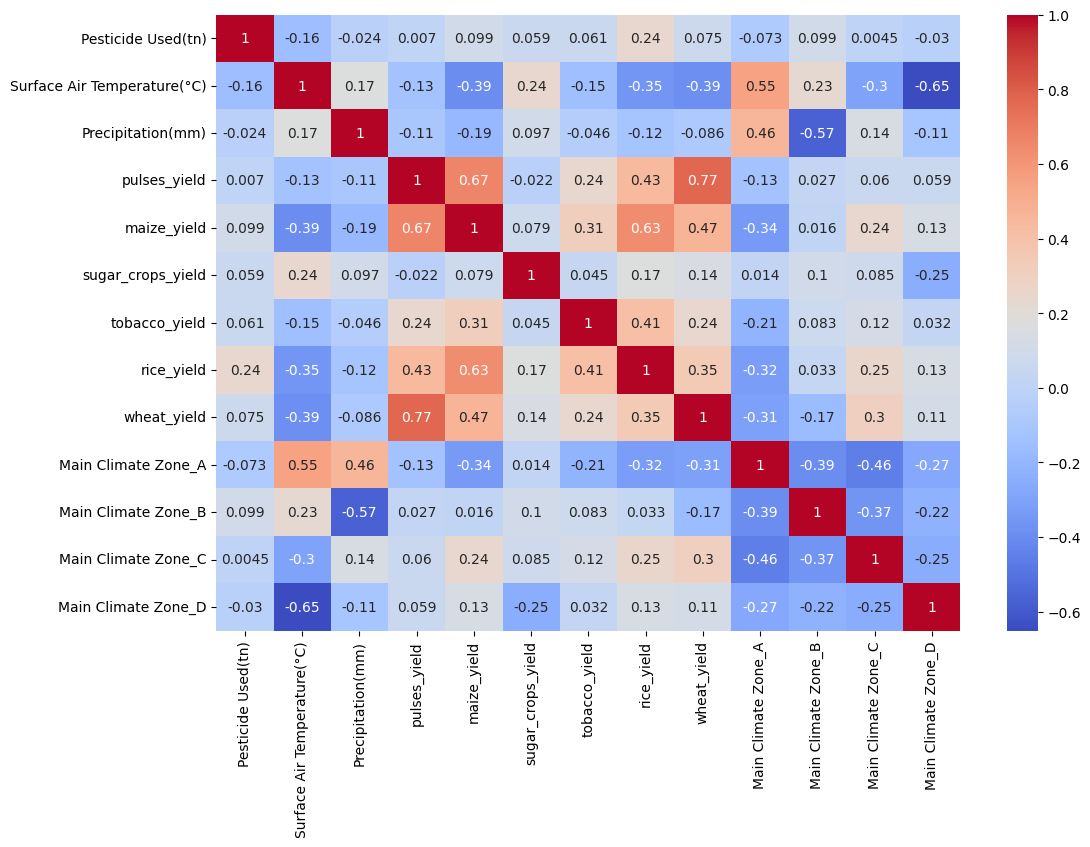

In [39]:
# Select relevant columns including the encoded climate zone
corr_data = ['Main Climate Zone', 'Pesticide Used(tn)', 'Surface Air Temperature(°C)', 'Precipitation(mm)', 'pulses_yield', 'maize_yield', 
             'sugar_crops_yield', 'tobacco_yield', 'rice_yield', 'wheat_yield']

# One-hot encode the main climate zone
encoded_data = pd.get_dummies(merged_cleaned_data[corr_data], columns=['Main Climate Zone'])

# Calculate the correlation matrix
corr_matrix = encoded_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

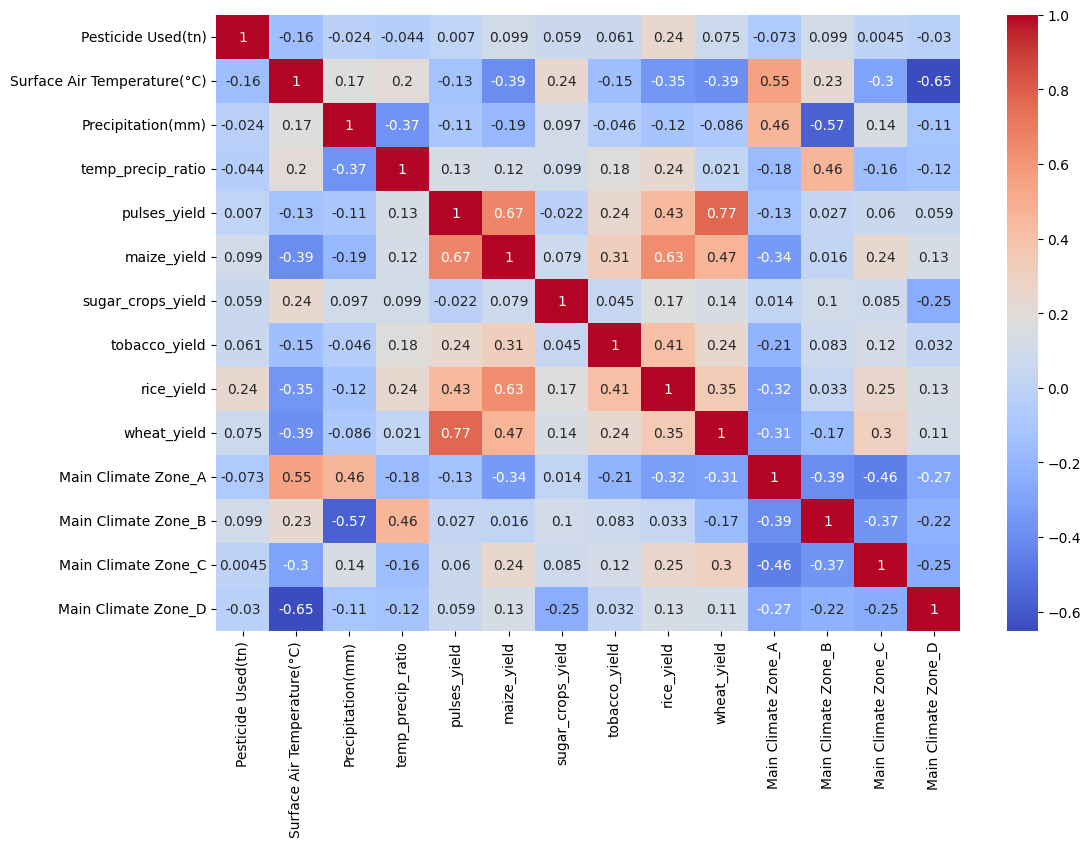

In [40]:
merged_cleaned_data['temp_precip_ratio'] = merged_cleaned_data['Surface Air Temperature(°C)'] / merged_cleaned_data['Precipitation(mm)']

corr_data = ['Main Climate Zone', 'Pesticide Used(tn)', 'Surface Air Temperature(°C)', 'Precipitation(mm)','temp_precip_ratio', 'pulses_yield', 
             'maize_yield', 'sugar_crops_yield', 'tobacco_yield', 'rice_yield', 'wheat_yield']

# One-hot encode the main climate zone
encoded_data = pd.get_dummies(merged_cleaned_data[corr_data], columns=['Main Climate Zone'])

# Calculate the correlation matrix
corr_matrix = encoded_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [41]:
merged_cleaned_data = merged_cleaned_data.drop(columns=['temp_precip_ratio'])

In [42]:
merged_cleaned_data

,Country Name,Main Climate Zone,Climate zone,Year,Pesticide Used(tn),Surface Air Temperature(°C),Precipitation(mm),pulses_yield,maize_yield,sugar_crops_yield,tobacco_yield,rice_yield,wheat_yield
0,Albania,C,CSB,1990,121.00,12.30,1229.55,0.5890,3.6613,28.166698,0.5875,2.3333,3.0197
1,Albania,C,CSB,1991,121.00,12.03,1287.92,0.7009,2.9068,12.888900,0.6364,2.8538,2.0698
2,Albania,C,CSB,1992,121.00,11.58,1319.90,1.0269,2.4876,12.908600,0.9727,4.0000,2.4388
3,Albania,C,CSB,1993,121.00,11.79,1278.50,0.9618,2.4185,12.143499,1.0362,4.1786,2.9976
4,Albania,C,CSB,1994,201.00,12.14,1284.35,0.7495,2.5848,28.776999,0.6002,NaN,2.4745
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4097,Zimbabwe,B,BSH,2012,3375.53,21.82,685.75,0.3877,0.7912,73.459496,1.5013,0.3791,2.4902
4098,Zimbabwe,B,BSH,2013,2550.07,22.02,655.18,0.3755,0.7449,84.969400,1.1698,0.3999,2.3430
4099,Zimbabwe,B,BSH,2014,2185.07,21.91,688.39,0.3459,0.9301,89.422800,1.4301,0.3426,2.2150
4100,Zimbabwe,B,BSH,2015,2185.07,21.95,714.71,0.3111,0.5803,77.690600,1.2948,0.3065,2.0486


### Kmeans clustering

In [43]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data_cat = merged_cleaned_data["Main Climate Zone"].values
data_cat_encoded = encoder.fit_transform(data_cat.astype('str'))   # this "fits" the labels to numerical classes
data_cat_encoded

array([2, 2, 2, ..., 1, 1, 1], dtype=int64)

In [44]:
encoder.classes_

array(['A', 'B', 'C', 'D'], dtype='<U1')

In [45]:
merged_cleaned_data['Main Climate Zone'] = encoder.fit_transform(merged_cleaned_data['Main Climate Zone'])
merged_cleaned_data

,Country Name,Main Climate Zone,Climate zone,Year,Pesticide Used(tn),Surface Air Temperature(°C),Precipitation(mm),pulses_yield,maize_yield,sugar_crops_yield,tobacco_yield,rice_yield,wheat_yield
0,Albania,2,CSB,1990,121.00,12.30,1229.55,0.5890,3.6613,28.166698,0.5875,2.3333,3.0197
1,Albania,2,CSB,1991,121.00,12.03,1287.92,0.7009,2.9068,12.888900,0.6364,2.8538,2.0698
2,Albania,2,CSB,1992,121.00,11.58,1319.90,1.0269,2.4876,12.908600,0.9727,4.0000,2.4388
3,Albania,2,CSB,1993,121.00,11.79,1278.50,0.9618,2.4185,12.143499,1.0362,4.1786,2.9976
4,Albania,2,CSB,1994,201.00,12.14,1284.35,0.7495,2.5848,28.776999,0.6002,NaN,2.4745
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4097,Zimbabwe,1,BSH,2012,3375.53,21.82,685.75,0.3877,0.7912,73.459496,1.5013,0.3791,2.4902
4098,Zimbabwe,1,BSH,2013,2550.07,22.02,655.18,0.3755,0.7449,84.969400,1.1698,0.3999,2.3430
4099,Zimbabwe,1,BSH,2014,2185.07,21.91,688.39,0.3459,0.9301,89.422800,1.4301,0.3426,2.2150
4100,Zimbabwe,1,BSH,2015,2185.07,21.95,714.71,0.3111,0.5803,77.690600,1.2948,0.3065,2.0486


In [46]:
data1 = merged_cleaned_data[['Main Climate Zone', 'Pesticide Used(tn)', 'Surface Air Temperature(°C)', 'Precipitation(mm)','maize_yield']]
                             #,'pulses_yield', 'sugar_crops_yield', 'tobacco_yield', 'rice_yield', 'wheat_yield']] 
#try using one type of crop only so there is less NaN values
data1.dropna(inplace=True)
data1.reset_index(drop=True)

C:\Users\yhcsa\AppData\Local\Temp\ipykernel_20672\3844105146.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.dropna(inplace=True)


,Main Climate Zone,Pesticide Used(tn),Surface Air Temperature(°C),Precipitation(mm),maize_yield
0,2,121.00,12.30,1229.55,3.6613
1,2,121.00,12.03,1287.92,2.9068
2,2,121.00,11.58,1319.90,2.4876
3,2,121.00,11.79,1278.50,2.4185
4,2,201.00,12.14,1284.35,2.5848
...,...,...,...,...,...
3611,1,3375.53,21.82,685.75,0.7912
3612,1,2550.07,22.02,655.18,0.7449
3613,1,2185.07,21.91,688.39,0.9301
3614,1,2185.07,21.95,714.71,0.5803


In [47]:
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation 

In [48]:
ss = StandardScaler()
X = ss.fit_transform(data1) #calc z value of all elements (fit=subtract mean, transform=div by std)
print(data1)
print(X)     # observe the values

      Main Climate Zone  Pesticide Used(tn)  Surface Air Temperature(°C)  \
0                     2              121.00                        12.30   
1                     2              121.00                        12.03   
2                     2              121.00                        11.58   
3                     2              121.00                        11.79   
4                     2              201.00                        12.14   
...                 ...                 ...                          ...   
4097                  1             3375.53                        21.82   
4098                  1             2550.07                        22.02   
4099                  1             2185.07                        21.91   
4100                  1             2185.07                        21.95   
4101                  1             2185.07                        22.03   

      Precipitation(mm)  maize_yield  
0               1229.55       3.6613  
1        

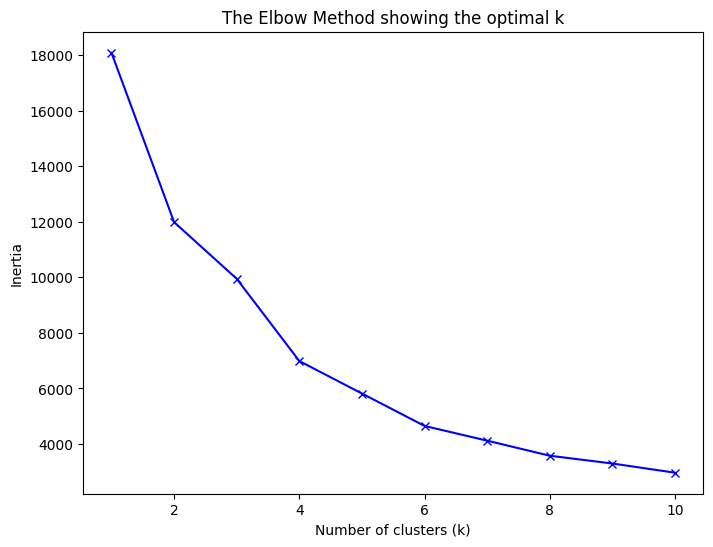

In [49]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Step 4: Plot the inertia against the number of clusters
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Optimal k/elbow is likely k=3 or k=4

In [50]:
model = KMeans(4, verbose=0, n_init='auto')
model.fit(X)

KMeans(n_clusters=4)

In [51]:
print(model.cluster_centers_.shape)
model.cluster_centers_

(4, 5)


array([[-0.72159908, -0.09391825,  0.61257204,  1.14200546, -0.42497549],
       [-0.34057652, -0.14906629,  0.59472581, -0.69904298, -0.37645349],
       [ 1.0641368 ,  0.01187472, -1.19847314, -0.30793439,  0.80847022],
       [-0.1723775 , 10.51335871, -1.62391466, -0.42973183,  0.39749964]])

In [52]:
print(model.labels_.shape)
model.labels_

(3616,)


array([2, 2, 2, ..., 1, 1, 1])

In [53]:
print(model.inertia_)
print(model.n_iter_)

6984.858789021485
18


In [54]:
kmeans_labels = pd.DataFrame(model.labels_)   # put into a DataFrame. We will use this shortly...
kmeans_labels

,0
0,2
1,2
2,2
3,2
4,2
...,...
3611,1
3612,1
3613,1
3614,1


In [55]:
model.labels_

array([2, 2, 2, ..., 1, 1, 1])

In [56]:
data1.insert((data1.shape[1]), 'kmeans', kmeans_labels)

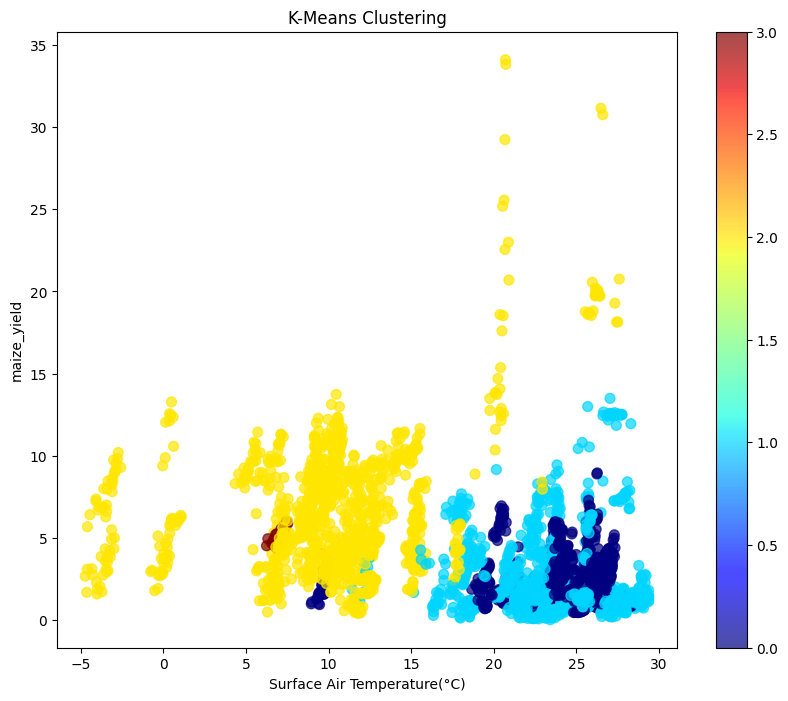

In [58]:
def plot_kmeans_scatter(x, y):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    scatter = ax.scatter(x, y, c=kmeans_labels[0],s=50,cmap='jet',alpha=0.7)
    ax.set_title('K-Means Clustering')
    ax.set_xlabel(x.name)
    ax.set_ylabel(y.name)
    plt.colorbar(scatter)
    plt.show()


v1 = data1['Main Climate Zone']
v2 = data1['Pesticide Used(tn)']
v3 = data1['Surface Air Temperature(°C)']
v4 = data1['Precipitation(mm)']
v5 = data1['maize_yield']

plot_kmeans_scatter(v3, v5)

# Data Mining
## Prediction Models and Analysis
### Experimenting with prediction models
Using regression models as the response (crop yield) is a continuous variable.
1. Prepping copies of data for each crop type
2. Baseline model: simple models eg. Linear Regression model
3. Advanced Models: Experiment with more complex models eg. Polynomial Regression model, Random Forests, 
4. Hyperparameter Tuning: Cross validation to evaluate the generalisation ability of the models.
5. Model Evaluation: Compare model performance using Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²)
6. Pickle it
7. Optionals: Using classification model to obtain more info from the merged_cleaned_data.

In [59]:
merged_cleaned_data = pd.read_csv('merged_cleaned_data.csv')

In [60]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data_cat = merged_cleaned_data["Main Climate Zone"].values
data_cat_encoded = encoder.fit_transform(data_cat.astype('str'))   
print(encoder.classes_)
merged_cleaned_data['Main Climate Zone'] = encoder.fit_transform(merged_cleaned_data['Main Climate Zone'])
merged_cleaned_data

['A' 'B' 'C' 'D']


,Country Name,Main Climate Zone,Climate zone,Year,Pesticide Used(tn),Surface Air Temperature(°C),Precipitation(mm),pulses_yield,maize_yield,sugar_crops_yield,tobacco_yield,rice_yield,wheat_yield
0,Albania,2,CSB,1990,121.00,12.30,1229.55,0.5890,3.6613,28.166698,0.5875,2.3333,3.0197
1,Albania,2,CSB,1991,121.00,12.03,1287.92,0.7009,2.9068,12.888900,0.6364,2.8538,2.0698
2,Albania,2,CSB,1992,121.00,11.58,1319.90,1.0269,2.4876,12.908600,0.9727,4.0000,2.4388
3,Albania,2,CSB,1993,121.00,11.79,1278.50,0.9618,2.4185,12.143499,1.0362,4.1786,2.9976
4,Albania,2,CSB,1994,201.00,12.14,1284.35,0.7495,2.5848,28.776999,0.6002,NaN,2.4745
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4097,Zimbabwe,1,BSH,2012,3375.53,21.82,685.75,0.3877,0.7912,73.459496,1.5013,0.3791,2.4902
4098,Zimbabwe,1,BSH,2013,2550.07,22.02,655.18,0.3755,0.7449,84.969400,1.1698,0.3999,2.3430
4099,Zimbabwe,1,BSH,2014,2185.07,21.91,688.39,0.3459,0.9301,89.422800,1.4301,0.3426,2.2150
4100,Zimbabwe,1,BSH,2015,2185.07,21.95,714.71,0.3111,0.5803,77.690600,1.2948,0.3065,2.0486


In [61]:
merged_cleaned_data.columns

Index(['Country Name', 'Main Climate Zone', 'Climate zone', 'Year',
       'Pesticide Used(tn)', 'Surface Air Temperature(°C)',
       'Precipitation(mm)', 'pulses_yield', 'maize_yield', 'sugar_crops_yield',
       'tobacco_yield', 'rice_yield', 'wheat_yield'],
      dtype='object')

In [62]:
merged_cleaned_data.dtypes

Country Name                    object
Main Climate Zone                int32
Climate zone                    object
Year                             int64
Pesticide Used(tn)             float64
Surface Air Temperature(°C)    float64
Precipitation(mm)              float64
pulses_yield                   float64
maize_yield                    float64
sugar_crops_yield              float64
tobacco_yield                  float64
rice_yield                     float64
wheat_yield                    float64
dtype: object

## Modelling Data Prep

In [63]:
import copy
from sklearn.model_selection import train_test_split

In [64]:
## Pulses
pulses_model_df = copy.deepcopy(merged_cleaned_data[['Main Climate Zone','Pesticide Used(tn)', 
                                                     'Surface Air Temperature(°C)', 'Precipitation(mm)', 
                                                     'pulses_yield']].dropna(subset=['pulses_yield']))
print(pulses_model_df.isna().sum())
pulses_model_df.reset_index(drop=True, inplace=True)
print(pulses_model_df)
X_pulses = pulses_model_df.drop("pulses_yield", axis=1)  
y_pulses = pulses_model_df["pulses_yield"].copy()        
print(X_pulses.shape)
print(y_pulses.shape)

X_pulses_train, X_pulses_test, y_pulses_train, y_pulses_test = train_test_split(X_pulses, y_pulses, random_state=1)
print(X_pulses_train.shape)
print(y_pulses_train.shape)
print(X_pulses_test.shape)
print(y_pulses_test.shape)

Main Climate Zone              0
Pesticide Used(tn)             0
Surface Air Temperature(°C)    0
Precipitation(mm)              0
pulses_yield                   0
dtype: int64
      Main Climate Zone  Pesticide Used(tn)  Surface Air Temperature(°C)  \
0                     2              121.00                        12.30   
1                     2              121.00                        12.03   
2                     2              121.00                        11.58   
3                     2              121.00                        11.79   
4                     2              201.00                        12.14   
...                 ...                 ...                          ...   
3804                  1             3375.53                        21.82   
3805                  1             2550.07                        22.02   
3806                  1             2185.07                        21.91   
3807                  1             2185.07                   

In [65]:
## Maize
maize_model_df = copy.deepcopy(merged_cleaned_data[['Main Climate Zone','Pesticide Used(tn)', 'Surface Air Temperature(°C)', 'Precipitation(mm)', 
                                     'maize_yield']].dropna(subset=['maize_yield']))
print(maize_model_df.isna().sum())
maize_model_df.reset_index(drop=True, inplace=True)
maize_model_df
X_maize = maize_model_df.drop("maize_yield", axis=1)     # drop labels from original data
y_maize = maize_model_df["maize_yield"].copy()    # copy the labels to another dataframe/series
print(X_maize.shape)
print(y_maize.shape)

X_maize_train, X_maize_test, y_maize_train, y_maize_test = train_test_split(X_maize, y_maize, random_state=1)
print(X_maize_train.shape)
print(y_maize_train.shape)
print(X_maize_test.shape)
print(y_maize_test.shape)

Main Climate Zone              0
Pesticide Used(tn)             0
Surface Air Temperature(°C)    0
Precipitation(mm)              0
maize_yield                    0
dtype: int64
(3616, 4)
(3616,)
(2712, 4)
(2712,)
(904, 4)
(904,)


In [66]:
## Sugar Crops
sugar_crops_model_df = copy.deepcopy(merged_cleaned_data[['Main Climate Zone','Pesticide Used(tn)', 
                                                          'Surface Air Temperature(°C)', 'Precipitation(mm)', 
                                                          'sugar_crops_yield']].dropna(subset=['sugar_crops_yield']))
print(sugar_crops_model_df.isna().sum())
sugar_crops_model_df.reset_index(drop=True, inplace=True)
print(sugar_crops_model_df)
X_sugar_crops = sugar_crops_model_df.drop("sugar_crops_yield", axis=1)  
y_sugar_crops = sugar_crops_model_df["sugar_crops_yield"].copy()        
print(X_sugar_crops.shape)
print(y_sugar_crops.shape)

X_sugar_crops_train, X_sugar_crops_test, y_sugar_crops_train, y_sugar_crops_test = train_test_split(X_sugar_crops, y_sugar_crops, random_state=1)
print(X_sugar_crops_train.shape)
print(y_sugar_crops_train.shape)
print(X_sugar_crops_test.shape)
print(y_sugar_crops_test.shape)

Main Climate Zone              0
Pesticide Used(tn)             0
Surface Air Temperature(°C)    0
Precipitation(mm)              0
sugar_crops_yield              0
dtype: int64
      Main Climate Zone  Pesticide Used(tn)  Surface Air Temperature(°C)  \
0                     2              121.00                        12.30   
1                     2              121.00                        12.03   
2                     2              121.00                        11.58   
3                     2              121.00                        11.79   
4                     2              201.00                        12.14   
...                 ...                 ...                          ...   
3127                  1             3375.53                        21.82   
3128                  1             2550.07                        22.02   
3129                  1             2185.07                        21.91   
3130                  1             2185.07                   

In [67]:
## Tobacco
tobacco_model_df = copy.deepcopy(merged_cleaned_data[['Main Climate Zone','Pesticide Used(tn)', 
                                                      'Surface Air Temperature(°C)', 'Precipitation(mm)', 
                                                      'tobacco_yield']].dropna(subset=['tobacco_yield']))
print(tobacco_model_df.isna().sum())
tobacco_model_df.reset_index(drop=True, inplace=True)
print(tobacco_model_df)
X_tobacco = tobacco_model_df.drop("tobacco_yield", axis=1)  
y_tobacco = tobacco_model_df["tobacco_yield"].copy()        
print(X_tobacco.shape)
print(y_tobacco.shape)

X_tobacco_train, X_tobacco_test, y_tobacco_train, y_tobacco_test = train_test_split(X_tobacco, y_tobacco, random_state=1)
print(X_tobacco_train.shape)
print(y_tobacco_train.shape)
print(X_tobacco_test.shape)
print(y_tobacco_test.shape)

Main Climate Zone              0
Pesticide Used(tn)             0
Surface Air Temperature(°C)    0
Precipitation(mm)              0
tobacco_yield                  0
dtype: int64
      Main Climate Zone  Pesticide Used(tn)  Surface Air Temperature(°C)  \
0                     2              121.00                        12.30   
1                     2              121.00                        12.03   
2                     2              121.00                        11.58   
3                     2              121.00                        11.79   
4                     2              201.00                        12.14   
...                 ...                 ...                          ...   
2867                  1             3375.53                        21.82   
2868                  1             2550.07                        22.02   
2869                  1             2185.07                        21.91   
2870                  1             2185.07                   

In [68]:
## Rice
rice_model_df = copy.deepcopy(merged_cleaned_data[['Main Climate Zone','Pesticide Used(tn)', 
                                                   'Surface Air Temperature(°C)', 'Precipitation(mm)', 
                                                   'rice_yield']].dropna(subset=['rice_yield']))
print(rice_model_df.isna().sum())
rice_model_df.reset_index(drop=True, inplace=True)
print(rice_model_df)
X_rice = rice_model_df.drop("rice_yield", axis=1)  
y_rice = rice_model_df["rice_yield"].copy()        
print(X_rice.shape)
print(y_rice.shape)

X_rice_train, X_rice_test, y_rice_train, y_rice_test = train_test_split(X_rice, y_rice, random_state=1)
print(X_rice_train.shape)
print(y_rice_train.shape)
print(X_rice_test.shape)
print(y_rice_test.shape)

Main Climate Zone              0
Pesticide Used(tn)             0
Surface Air Temperature(°C)    0
Precipitation(mm)              0
rice_yield                     0
dtype: int64
      Main Climate Zone  Pesticide Used(tn)  Surface Air Temperature(°C)  \
0                     2              121.00                        12.30   
1                     2              121.00                        12.03   
2                     2              121.00                        11.58   
3                     2              121.00                        11.79   
4                     1             1828.92                        23.12   
...                 ...                 ...                          ...   
2635                  1             3375.53                        21.82   
2636                  1             2550.07                        22.02   
2637                  1             2185.07                        21.91   
2638                  1             2185.07                   

In [69]:
## Wheat
wheat_model_df = copy.deepcopy(merged_cleaned_data[['Main Climate Zone','Pesticide Used(tn)', 
                                                    'Surface Air Temperature(°C)', 'Precipitation(mm)', 
                                                    'wheat_yield']].dropna(subset=['wheat_yield']))
print(wheat_model_df.isna().sum())
wheat_model_df.reset_index(drop=True, inplace=True)
print(wheat_model_df)
X_wheat = wheat_model_df.drop("wheat_yield", axis=1)  
y_wheat = wheat_model_df["wheat_yield"].copy()        
print(X_wheat.shape)
print(y_wheat.shape)

X_wheat_train, X_wheat_test, y_wheat_train, y_wheat_test = train_test_split(X_wheat, y_wheat, random_state=1)
print(X_wheat_train.shape)
print(y_wheat_train.shape)
print(X_wheat_test.shape)
print(y_wheat_test.shape)

Main Climate Zone              0
Pesticide Used(tn)             0
Surface Air Temperature(°C)    0
Precipitation(mm)              0
wheat_yield                    0
dtype: int64
      Main Climate Zone  Pesticide Used(tn)  Surface Air Temperature(°C)  \
0                     2              121.00                        12.30   
1                     2              121.00                        12.03   
2                     2              121.00                        11.58   
3                     2              121.00                        11.79   
4                     2              201.00                        12.14   
...                 ...                 ...                          ...   
2934                  1             3375.53                        21.82   
2935                  1             2550.07                        22.02   
2936                  1             2185.07                        21.91   
2937                  1             2185.07                   

#### Linear Regression Model

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

def train_linear_regression(X_train, y_train, X_test, y_test, df, crop_name, crop_yield):
    # Initialize Linear Regression model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    # Print Linear Regression Equation
    coef_lr = lr_model.coef_
    intercept_lr = lr_model.intercept_
    equation = f'{crop_name}_yield = {intercept_lr:.2f}'
    feature_names = X_train.columns
    for coef, feature in zip(coef_lr, feature_names):
        equation += f' + ({coef:.2f} * {feature})'
    print(f'Linear Regression Equation for {crop_name}: {equation}')

    # Evaluate Linear Regression Model
    y_pred_lr = lr_model.predict(X_test)
    mse_lr = mean_squared_error(y_test, y_pred_lr)
    mae_lr = mean_absolute_error(y_test, y_pred_lr)
    r2_lr = r2_score(y_test, y_pred_lr)
    print(f'Linear Regression - MSE: {mse_lr}, MAE: {mae_lr}, R²: {r2_lr}')

    # Visualize the regression line
    features = ['Surface Air Temperature(°C)', 'Precipitation(mm)', 'Main Climate Zone', 'Pesticide Used(tn)']
    fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(6, len(feature)))
    for i, feature in enumerate(features):
        sns.regplot(x=feature, y=crop_yield, data = df,
                    scatter_kws={"color": "blue"}, line_kws={"color": "red"}, ax=axes[i])
        axes[i].set_title(f'{crop_name.capitalize()} Yield vs {feature}')
    
    plt.tight_layout()
    plt.show()

    # Return model and predictions
    return lr_model, mse_lr, mae_lr, r2_lr

#### Random Forest Regression Model

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def train_random_forest(X_train, y_train, X_test, y_test):
    # Initialize Random Forest Regressor model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Evaluate the Random Forest Regressor model
    y_pred_rf = rf_model.predict(X_test)
    mse_rf = mean_squared_error(y_test, y_pred_rf)
    mae_rf = mean_absolute_error(y_test, y_pred_rf)
    r2_rf = r2_score(y_test, y_pred_rf)
    print(f'Random Forest - MSE: {mse_rf}, MAE: {mae_rf}, R²: {r2_rf}')

    # Return model and evaluation metrics
    return rf_model, mse_rf, mae_rf, r2_rf

#### Polynomial Regression Model

In [72]:
from sklearn.preprocessing import PolynomialFeatures

def train_polynomial_regression(X_train, y_train, X_test, y_test, X, crop_name):
    mae_scores = []
    for deg in range(2,10):
        poly_deg = PolynomialFeatures(degree = deg)
        X_train_poly = poly_deg.fit_transform(X_train)
        X_test_poly = poly_deg.transform(X_test)
        poly_model = LinearRegression()
        poly_model.fit(X_train_poly, y_train)
        y_pred_poly = poly_model.predict(X_test_poly)
        poly_mae = mean_absolute_error(y_test, y_pred_poly)
        mae_scores.append(poly_mae)

    poly_deg = np.arange(2, 10)
    plt.figure(figsize=(10, 6))
    plt.plot(poly_deg, mae_scores, marker='o', linestyle='-', color='b')
    plt.xlabel('poly_deg')
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.title('poly_deg vs. MAE')
    plt.grid(True)
    plt.show()

    optimal_poly_deg = poly_deg[np.argmin(mae_scores)]
    optimal_poly_deg
    print('Optimal degree of polynomial of the polynomial regression is %d' % optimal_poly_deg)

    poly_deg = PolynomialFeatures(degree = optimal_poly_deg)
    X_train_poly = poly_deg.fit_transform(X_train)
    X_test_poly = poly_deg.transform(X_test)
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    coef_poly = poly_model.coef_
    intercept_poly = poly_model.intercept_
    feature_names = X.columns
    equation = f'{crop_name}_yield = {intercept_poly:.2f}'
    for coef, feature in zip(coef_poly, feature_names):
        equation += f' + ({coef:.2f} * {feature})'
    print(f'Polynomial Regression Equation for {crop_name}: {equation}')


    y_pred_poly = poly_model.predict(X_test_poly)

    mse_poly = mean_squared_error(y_test, y_pred_poly)
    mae_poly = mean_absolute_error(y_test, y_pred_poly)
    r2_poly = r2_score(y_test, y_pred_poly)
    print(f'Polynomial Regression - MSE: {mse_poly}, MAE: {mae_poly}, R²: {r2_poly}')

    return poly_model, mse_poly, mae_poly, r2_poly

#### Gradient Boosting Regression Model

In [73]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

def train_gradient_boosting(X_train, y_train, X_test, y_test):
    # Initialize Gradient Boosting model
    gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
    gb_model.fit(X_train, y_train)

    # Evaluate Gradient Boosting Model
    y_pred_gb = gb_model.predict(X_test)
    mse_gb = mean_squared_error(y_test, y_pred_gb)
    mae_gb = mean_absolute_error(y_test, y_pred_gb)
    r2_gb = r2_score(y_test, y_pred_gb)
    print(f'Gradient Boosting - MSE: {mse_gb}, MAE: {mae_gb}, R²: {r2_gb}')

    # Return model and predictions
    return gb_model, mse_gb, mae_gb, r2_gb

#### Decision Tree Regression Model

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def train_decision_tree(X_train, y_train, X_test, y_test, crop_name):
    # Find optimal max depth
    mae_scores = []
    for md in range(1, 21):
        dtr = DecisionTreeRegressor(max_depth=md)
        dtr.fit(X_train, y_train)
        y_pred_dtr = dtr.predict(X_test)
        dtr_mae = mean_absolute_error(y_test, y_pred_dtr)
        mae_scores.append(dtr_mae)

    max_depths = np.arange(1, 21)
    plt.figure(figsize=(8, 5))
    plt.plot(max_depths, mae_scores, marker='o', linestyle='-', color='b')
    plt.xlabel('max_depth')
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.title(f'{crop_name.capitalize()} Decision Tree max_depth vs. MAE')
    plt.grid(True)
    plt.show()

    optimal_max_depth = max_depths[np.argmin(mae_scores)]
    print(f'Optimal max depth of the decision tree for {crop_name} is {optimal_max_depth}')

    # Initialize and train the Decision Tree model with optimal max depth
    dtr_model = DecisionTreeRegressor(max_depth=optimal_max_depth)
    dtr_model.fit(X_train, y_train)

    # Evaluate the Decision Tree model
    y_pred_dtr = dtr_model.predict(X_test)
    mse_dtr = mean_squared_error(y_test, y_pred_dtr)
    mae_dtr = mean_absolute_error(y_test, y_pred_dtr)
    r2_dtr = r2_score(y_test, y_pred_dtr)
    print(f'Decision Tree - MSE: {mse_dtr}, MAE: {mae_dtr}, R²: {r2_dtr}')

    # Return model and predictions
    return dtr_model, mse_dtr, mae_dtr, r2_dtr

## Fit in Model for all selected crops

Linear Regression Equation for pulses: pulses_yield = 2.55 + (0.06 * Main Climate Zone) + (-0.00 * Pesticide Used(tn)) + (-0.05 * Surface Air Temperature(°C)) + (-0.00 * Precipitation(mm))
Linear Regression - MSE: 23.89485139364762, MAE: 0.8351920267383635, R²: 0.0073532977687553736


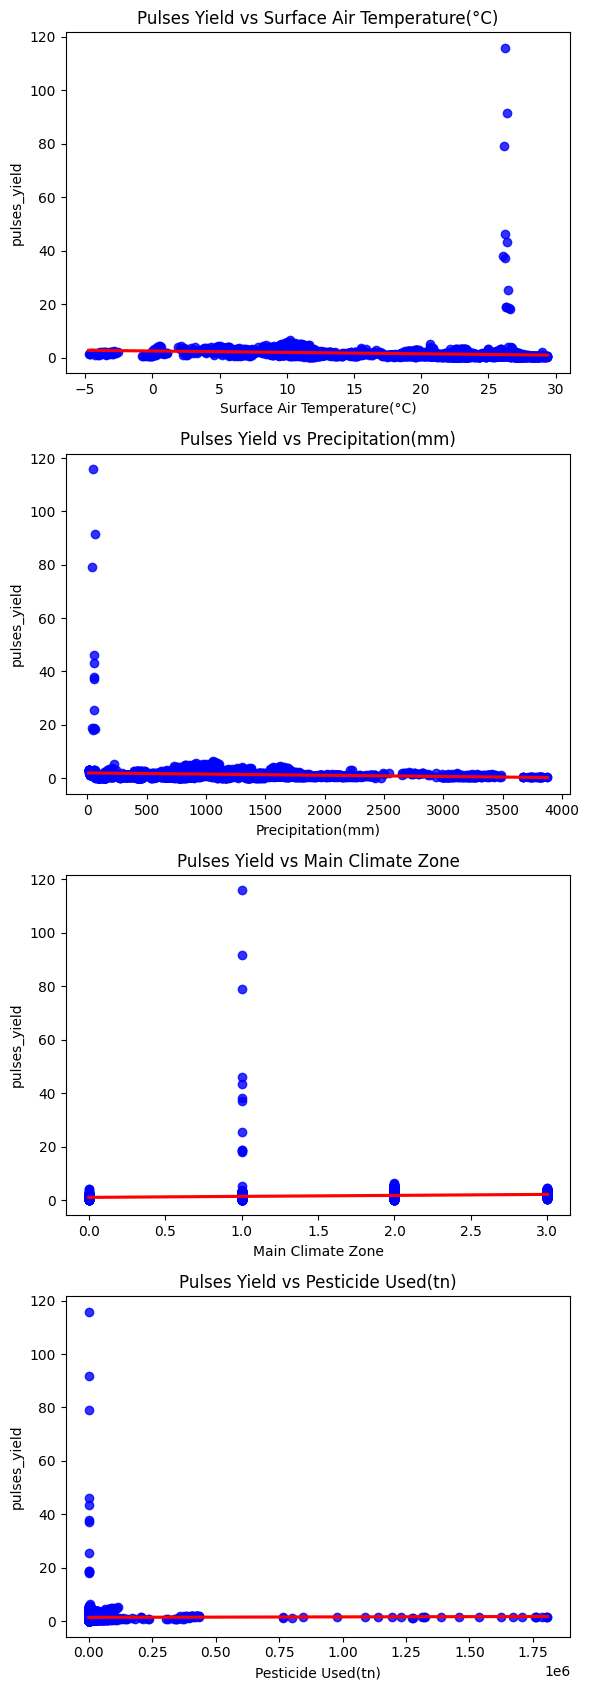

Random Forest - MSE: 17.826722777584333, MAE: 0.4314627943134335, R²: 0.2594372199584368


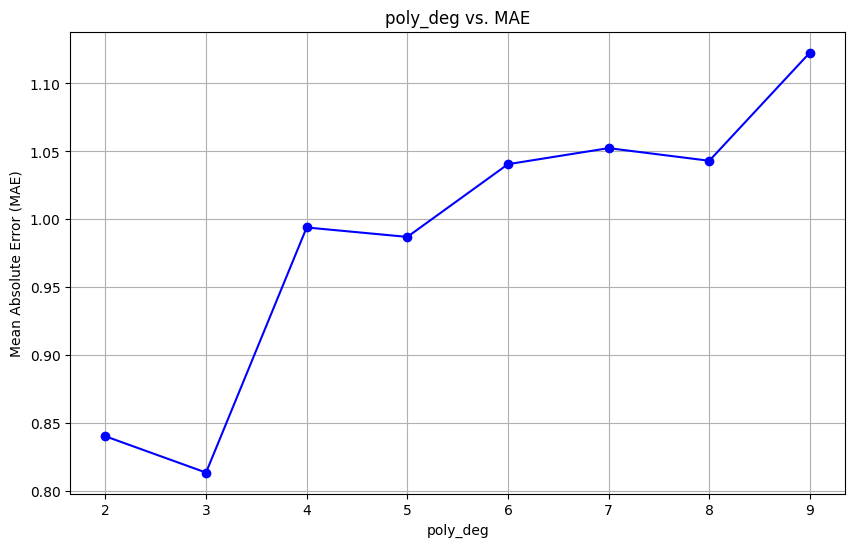

Optimal degree of polynomial of the polynomial regression is 3
Polynomial Regression Equation for pulses: pulses_yield = 1.58 + (-0.00 * Main Climate Zone) + (0.00 * Pesticide Used(tn)) + (-0.00 * Surface Air Temperature(°C)) + (-0.00 * Precipitation(mm)) + (0.00 * pulses_yield)
Polynomial Regression - MSE: 23.26492664292309, MAE: 0.8134535825102766, R²: 0.03352181064876336
Gradient Boosting - MSE: 17.623048815644, MAE: 0.597835978863802, R²: 0.2678983015244929


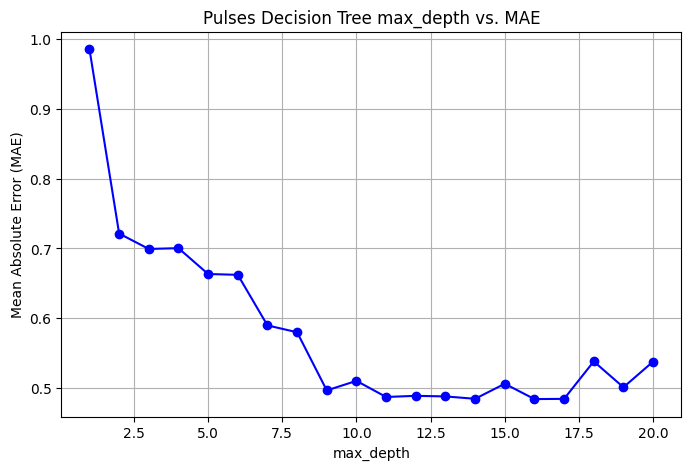

Optimal max depth of the decision tree for pulses is 16
Decision Tree - MSE: 19.20617798516989, MAE: 0.5386241273761228, R²: 0.20213149998858815


In [85]:
# Pulses
lr_pulses, mse_lr_pulses, mae_lr_pulses, r2_lr_pulses = train_linear_regression(X_pulses_train, y_pulses_train, X_pulses_test, y_pulses_test, pulses_model_df, 'pulses', 'pulses_yield')
rf_pulses, mse_rf_pulses, mae_rf_pulses, r2_rf_pulses = train_random_forest(X_pulses_train, y_pulses_train, X_pulses_test, y_pulses_test)
poly_pulses, mse_poly_pulses, mae_poly_pulses, r2_poly_pulses = train_polynomial_regression(X_pulses_train, y_pulses_train, X_pulses_test, y_pulses_test, pulses_model_df, 'pulses')
gb_pulses, mse_gb_pulses, mae_gb_pulses, r2_gb_pulses = train_gradient_boosting(X_pulses_train, y_pulses_train, X_pulses_test, y_pulses_test)
dtr_pulses, mse_dtr_pulses, mae_dtr_pulses, r2_dtr_pulses = train_decision_tree(X_pulses_train, y_pulses_train, X_pulses_test, y_pulses_test, 'pulses')

Linear Regression Equation for maize: maize_yield = 6.82 + (0.28 * Main Climate Zone) + (0.00 * Pesticide Used(tn)) + (-0.14 * Surface Air Temperature(°C)) + (-0.00 * Precipitation(mm))
Linear Regression - MSE: 8.576323889636718, MAE: 2.1187211995425597, R²: 0.1780430950258568


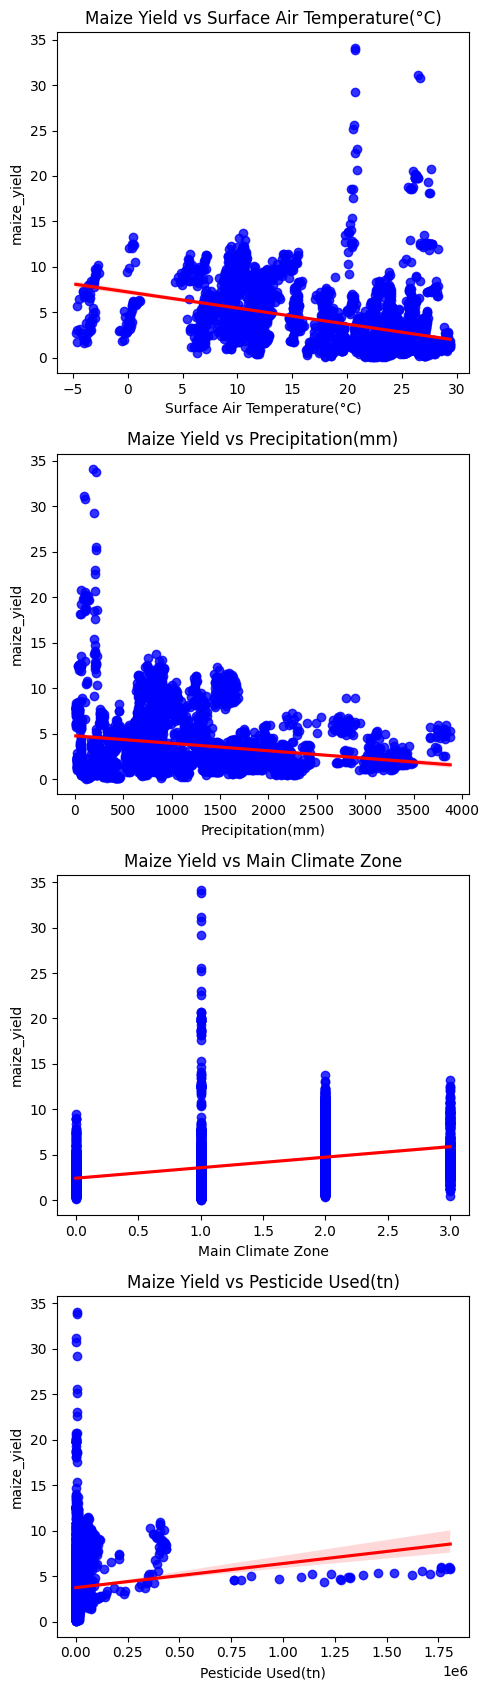

Random Forest - MSE: 1.4122074241284468, MAE: 0.6293037633968364, R²: 0.8646537072928464


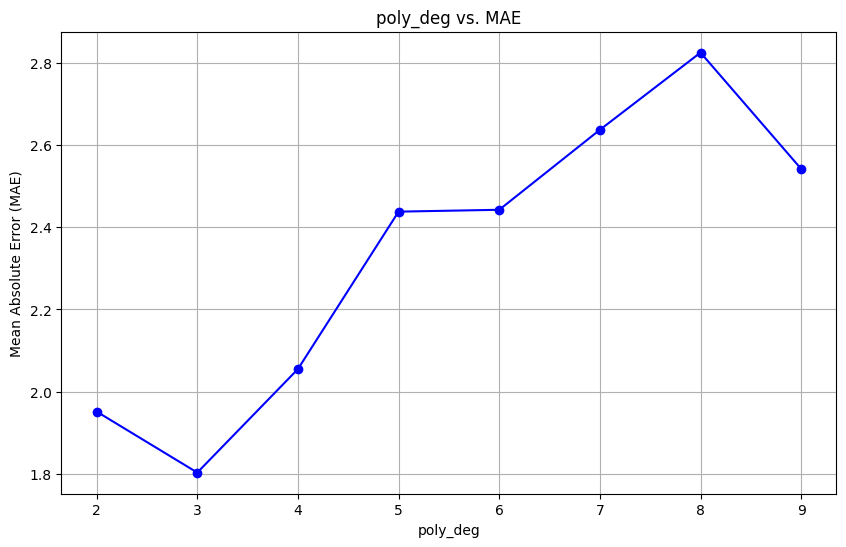

Optimal degree of polynomial of the polynomial regression is 3
Polynomial Regression Equation for maize: maize_yield = 4.93 + (-0.00 * Main Climate Zone) + (0.00 * Pesticide Used(tn)) + (-0.00 * Surface Air Temperature(°C)) + (-0.00 * Precipitation(mm)) + (0.00 * maize_yield)
Polynomial Regression - MSE: 6.856751737819637, MAE: 1.803386389819205, R²: 0.3428472957505061
Gradient Boosting - MSE: 3.2889083258921676, MAE: 1.1616361699792113, R²: 0.684790250102305


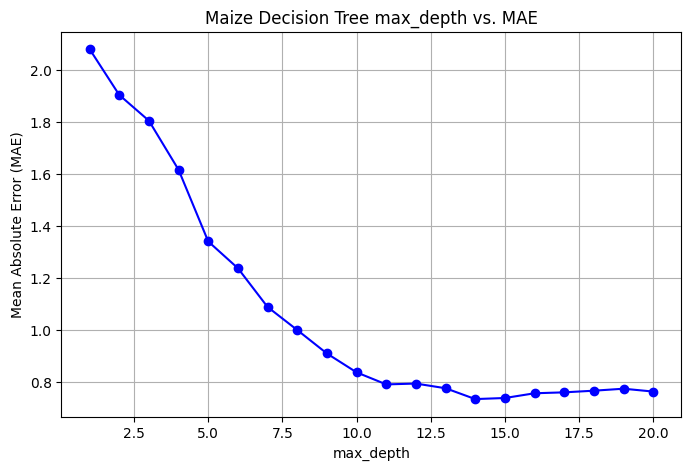

Optimal max depth of the decision tree for maize is 14
Decision Tree - MSE: 2.659792775975517, MAE: 0.7432962613361697, R²: 0.7450848328320274


In [82]:
# Maize
lr_maize, mse_lr_maize, mae_lr_maize, r2_lr_maize = train_linear_regression(X_maize_train, y_maize_train, X_maize_test, y_maize_test, maize_model_df, 'maize', 'maize_yield')
rf_maize, mse_rf_maize, mae_rf_maize, r2_rf_maize = train_random_forest(X_maize_train, y_maize_train, X_maize_test, y_maize_test)
poly_maize, mse_poly_maize, mae_poly_maize, r2_poly_maize = train_polynomial_regression(X_maize_train, y_maize_train, X_maize_test, y_maize_test, maize_model_df, 'maize')
gb_maize, mse_gb_maize, mae_gb_maize, r2_gb_maize = train_gradient_boosting(X_maize_train, y_maize_train, X_maize_test, y_maize_test)
dtr_maize, mse_dtr_maize, mae_dtr_maize, r2_dtr_maize = train_decision_tree(X_maize_train, y_maize_train, X_maize_test, y_maize_test, 'maize')

Linear Regression Equation for sugar_crops: sugar_crops_yield = 20.58 + (5.02 * Main Climate Zone) + (0.00 * Pesticide Used(tn)) + (1.33 * Surface Air Temperature(°C)) + (0.00 * Precipitation(mm))
Linear Regression - MSE: 542.6209299323433, MAE: 18.391582008294478, R²: 0.1089622529977261


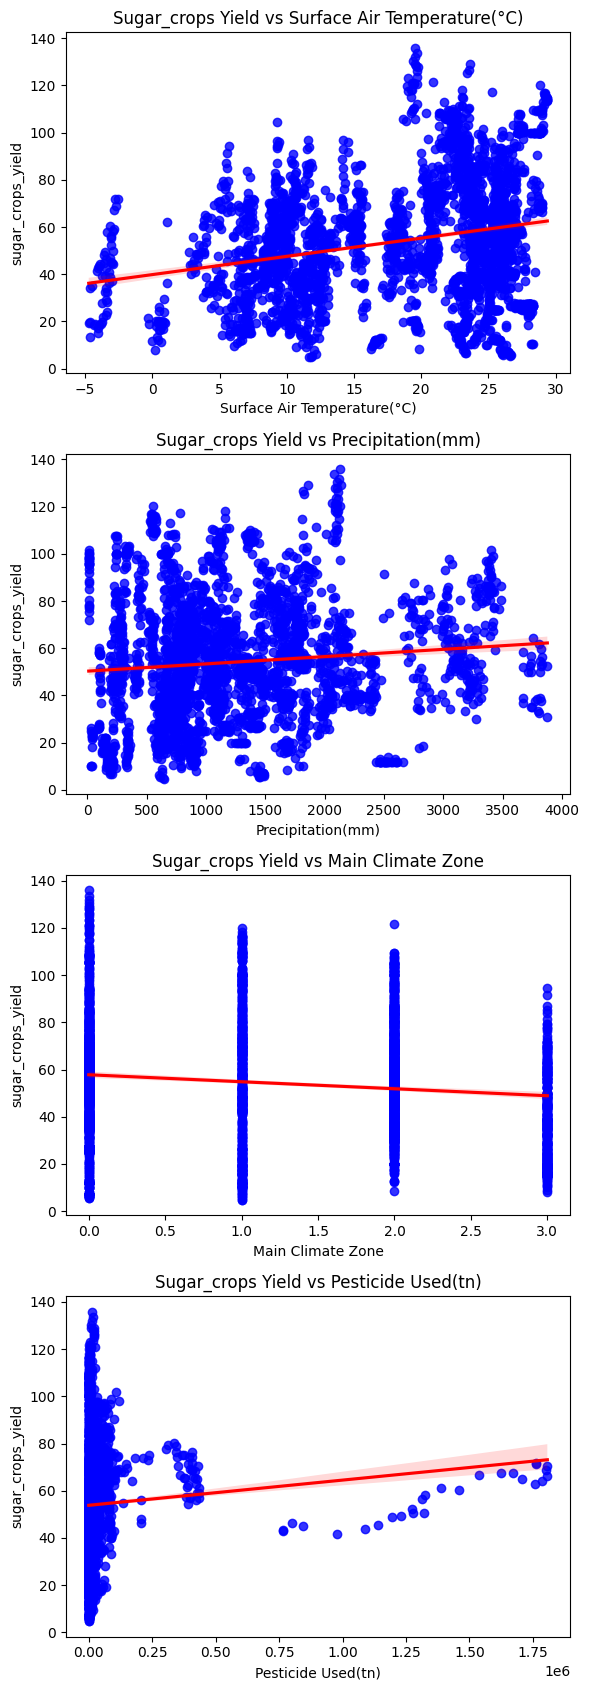

Random Forest - MSE: 70.90639298238071, MAE: 5.706355956936144, R²: 0.8835646228040707


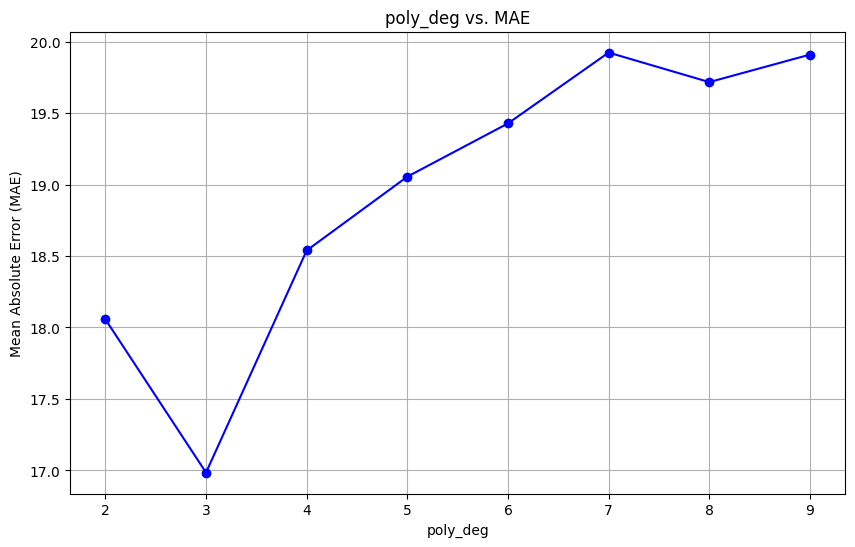

Optimal degree of polynomial of the polynomial regression is 3
Polynomial Regression Equation for sugar_crops: sugar_crops_yield = 27.02 + (-0.00 * Main Climate Zone) + (-0.00 * Pesticide Used(tn)) + (-0.00 * Surface Air Temperature(°C)) + (0.00 * Precipitation(mm)) + (-0.00 * sugar_crops_yield)
Polynomial Regression - MSE: 473.64851721772277, MAE: 16.983906624682188, R²: 0.22222184148836777
Gradient Boosting - MSE: 186.67085036847124, MAE: 10.64558491327921, R²: 0.6934678248329637


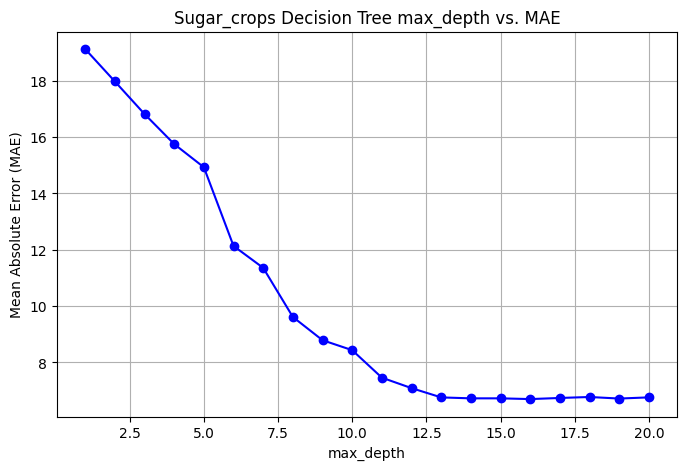

Optimal max depth of the decision tree for sugar_crops is 16
Decision Tree - MSE: 115.7196831849588, MAE: 6.597503303348384, R²: 0.809976725737802


In [86]:
# Sugar Crops
lr_sugar_crops, mse_lr_sugar_crops, mae_lr_sugar_crops, r2_lr_sugar_crops = train_linear_regression(X_sugar_crops_train, y_sugar_crops_train, X_sugar_crops_test, y_sugar_crops_test, sugar_crops_model_df, 'sugar_crops', 'sugar_crops_yield')
rf_sugar_crops, mse_rf_sugar_crops, mae_rf_sugar_crops, r2_rf_sugar_crops = train_random_forest(X_sugar_crops_train, y_sugar_crops_train, X_sugar_crops_test, y_sugar_crops_test)
poly_sugar_crops, mse_poly_sugar_crops, mae_poly_sugar_crops, r2_poly_sugar_crops = train_polynomial_regression(X_sugar_crops_train, y_sugar_crops_train, X_sugar_crops_test, y_sugar_crops_test, sugar_crops_model_df, 'sugar_crops')
gb_sugar_crops, mse_gb_sugar_crops, mae_gb_sugar_crops, r2_gb_sugar_crops = train_gradient_boosting(X_sugar_crops_train, y_sugar_crops_train, X_sugar_crops_test, y_sugar_crops_test)
dtr_sugar_crops, mse_dtr_sugar_crops, mae_dtr_sugar_crops, r2_dtr_sugar_crops = train_decision_tree(X_sugar_crops_train, y_sugar_crops_train, X_sugar_crops_test, y_sugar_crops_test, 'sugar_crops')

Linear Regression Equation for tobacco: tobacco_yield = 1.76 + (0.12 * Main Climate Zone) + (0.00 * Pesticide Used(tn)) + (-0.01 * Surface Air Temperature(°C)) + (-0.00 * Precipitation(mm))
Linear Regression - MSE: 0.9776375359367823, MAE: 0.6881556217366742, R²: 0.02526096147633261


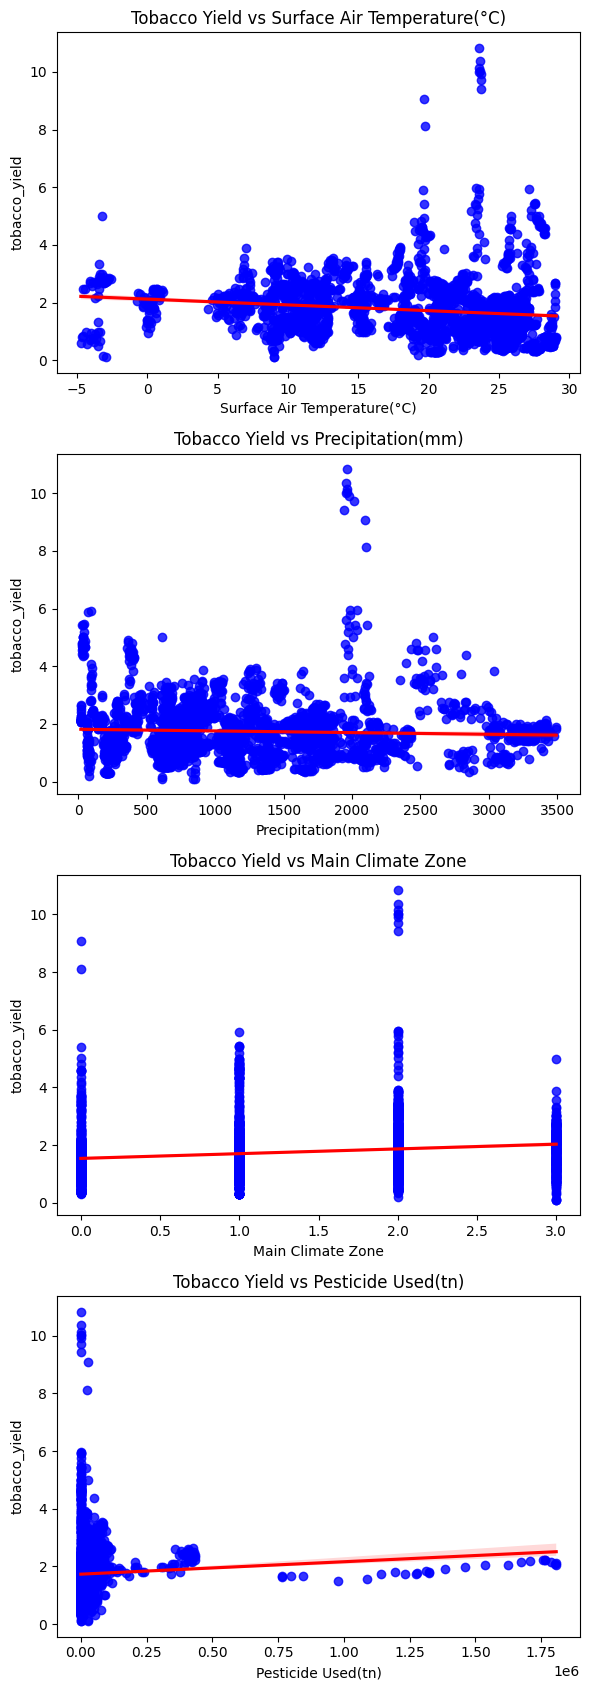

Random Forest - MSE: 0.19329137475959937, MAE: 0.23897002006718668, R²: 0.8072816950429847


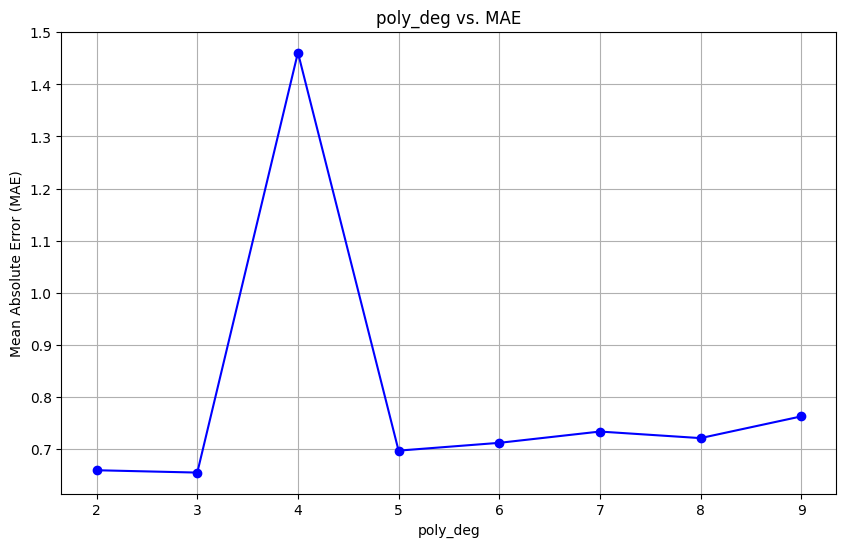

Optimal degree of polynomial of the polynomial regression is 3
Polynomial Regression Equation for tobacco: tobacco_yield = 2.21 + (0.00 * Main Climate Zone) + (-0.00 * Pesticide Used(tn)) + (-0.00 * Surface Air Temperature(°C)) + (0.00 * Precipitation(mm)) + (-0.00 * tobacco_yield)
Polynomial Regression - MSE: 0.8952401780441568, MAE: 0.6547026886120468, R²: 0.10741402788063004
Gradient Boosting - MSE: 0.4191481138363313, MAE: 0.3875696760314966, R²: 0.582094575482571


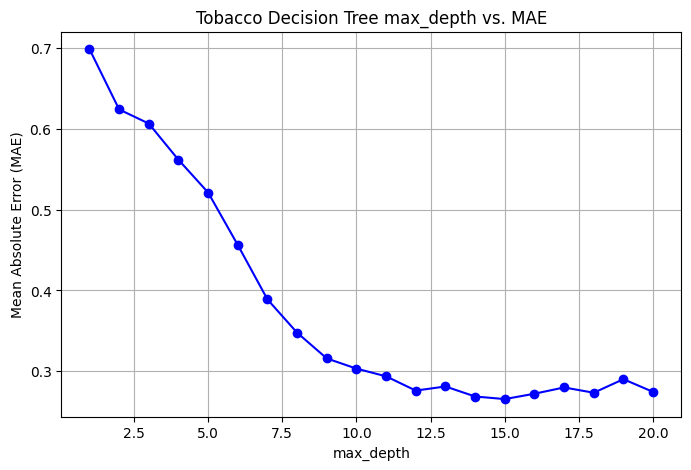

Optimal max depth of the decision tree for tobacco is 15
Decision Tree - MSE: 0.23621555998243557, MAE: 0.27106447709199294, R²: 0.7644847713411674


In [87]:
# Tobacco
lr_tobacco, mse_lr_tobacco, mae_lr_tobacco, r2_lr_tobacco = train_linear_regression(X_tobacco_train, y_tobacco_train, X_tobacco_test, y_tobacco_test, tobacco_model_df, 'tobacco', 'tobacco_yield')
rf_tobacco, mse_rf_tobacco, mae_rf_tobacco, r2_rf_tobacco = train_random_forest(X_tobacco_train, y_tobacco_train, X_tobacco_test, y_tobacco_test)
poly_tobacco, mse_poly_tobacco, mae_poly_tobacco, r2_poly_tobacco = train_polynomial_regression(X_tobacco_train, y_tobacco_train, X_tobacco_test, y_tobacco_test, tobacco_model_df, 'tobacco')
gb_tobacco, mse_gb_tobacco, mae_gb_tobacco, r2_gb_tobacco = train_gradient_boosting(X_tobacco_train, y_tobacco_train, X_tobacco_test, y_tobacco_test)
dtr_tobacco, mse_dtr_tobacco, mae_dtr_tobacco, r2_dtr_tobacco = train_decision_tree(X_tobacco_train, y_tobacco_train, X_tobacco_test, y_tobacco_test, 'tobacco')

Linear Regression Equation for rice: rice_yield = 4.11 + (0.42 * Main Climate Zone) + (0.00 * Pesticide Used(tn)) + (-0.04 * Surface Air Temperature(°C)) + (-0.00 * Precipitation(mm))
Linear Regression - MSE: 3.2649881654128863, MAE: 1.4446095804368422, R²: 0.16910384472700057


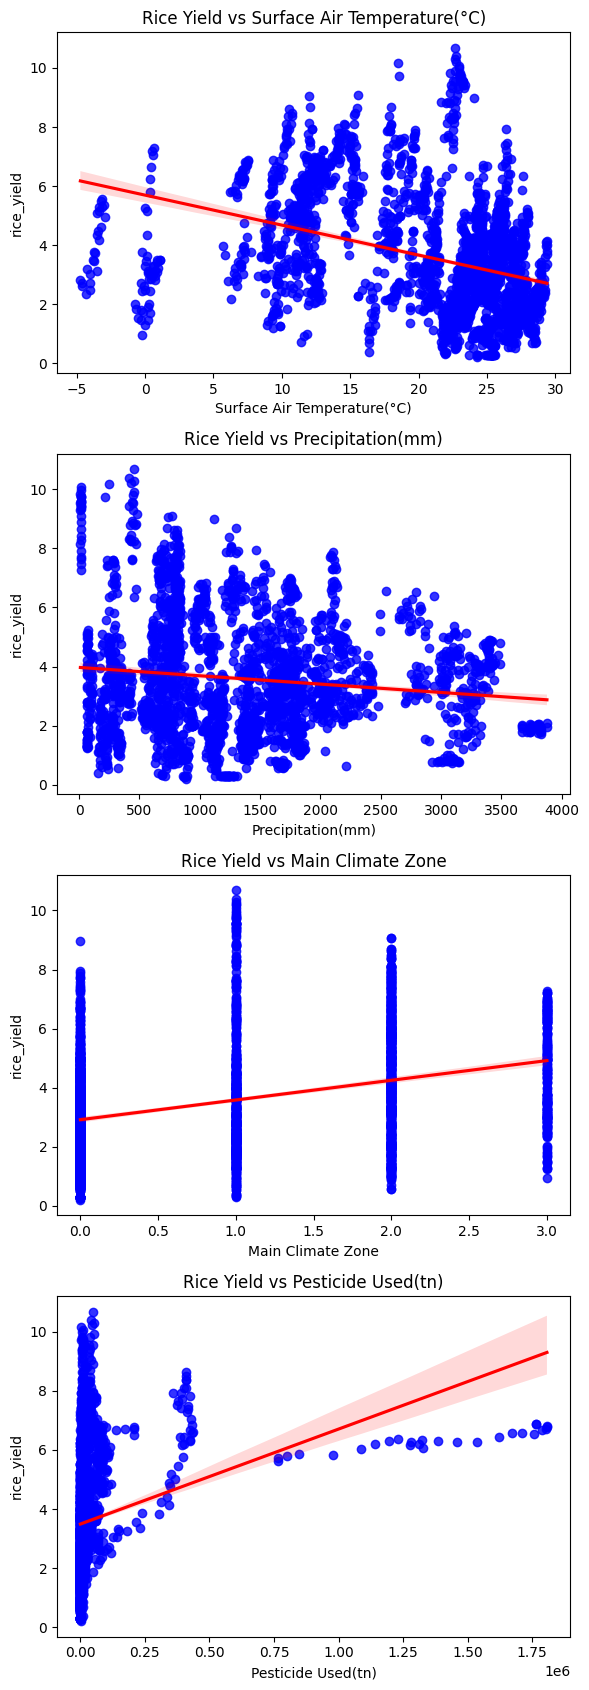

Random Forest - MSE: 0.4218549988816167, MAE: 0.44117750048409077, R²: 0.8926435016314662


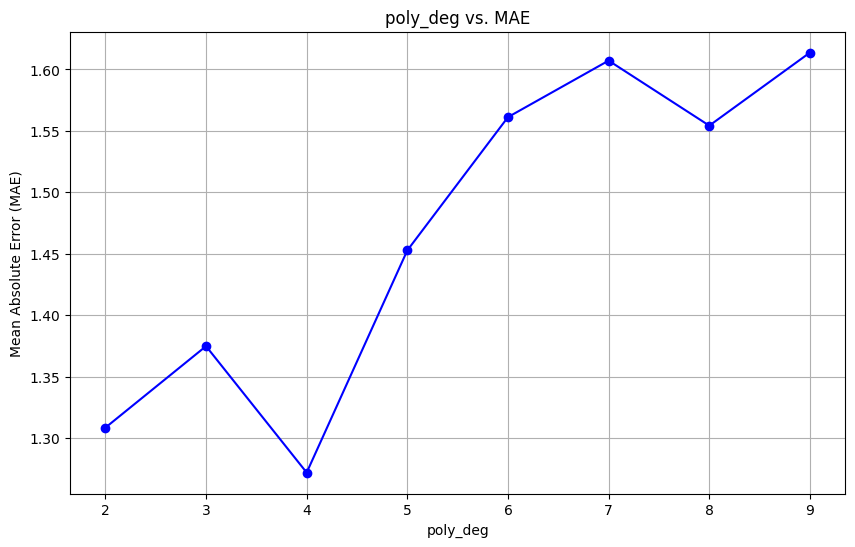

Optimal degree of polynomial of the polynomial regression is 4
Polynomial Regression Equation for rice: rice_yield = 3.47 + (0.00 * Main Climate Zone) + (0.00 * Pesticide Used(tn)) + (0.00 * Surface Air Temperature(°C)) + (0.00 * Precipitation(mm)) + (-0.00 * rice_yield)
Polynomial Regression - MSE: 2.6692396837505217, MAE: 1.2718420778154875, R²: 0.3207139265541694
Gradient Boosting - MSE: 1.048637658905303, MAE: 0.7895728094481734, R²: 0.7331356332960213


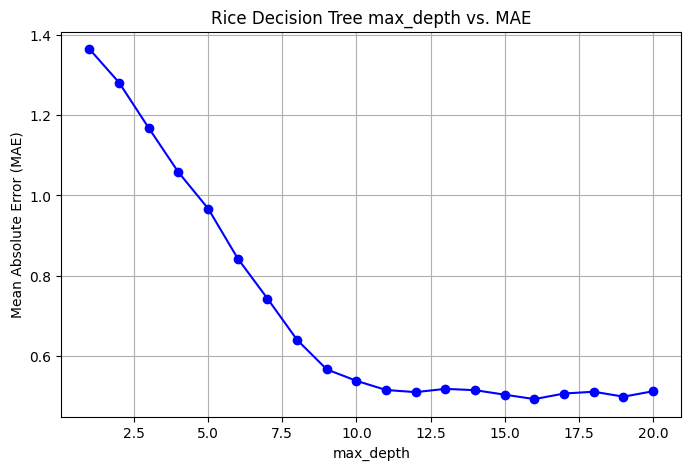

Optimal max depth of the decision tree for rice is 16
Decision Tree - MSE: 0.6426605837306287, MAE: 0.4924543498998246, R²: 0.8364514108124634


In [88]:
# Rice
lr_rice, mse_lr_rice, mae_lr_rice, r2_lr_rice = train_linear_regression(X_rice_train, y_rice_train, X_rice_test, y_rice_test, rice_model_df, 'rice', 'rice_yield')
rf_rice, mse_rf_rice, mae_rf_rice, r2_rf_rice = train_random_forest(X_rice_train, y_rice_train, X_rice_test, y_rice_test)
poly_rice, mse_poly_rice, mae_poly_rice, r2_poly_rice = train_polynomial_regression(X_rice_train, y_rice_train, X_rice_test, y_rice_test, rice_model_df, 'rice')
gb_rice, mse_gb_rice, mae_gb_rice, r2_gb_rice = train_gradient_boosting(X_rice_train, y_rice_train, X_rice_test, y_rice_test)
dtr_rice, mse_dtr_rice, mae_dtr_rice, r2_dtr_rice = train_decision_tree(X_rice_train, y_rice_train, X_rice_test, y_rice_test, 'rice')

Linear Regression Equation for wheat: wheat_yield = 3.68 + (0.31 * Main Climate Zone) + (0.00 * Pesticide Used(tn)) + (-0.06 * Surface Air Temperature(°C)) + (-0.00 * Precipitation(mm))
Linear Regression - MSE: 3.182144206987801, MAE: 1.3204031975315573, R²: 0.16741971427731472


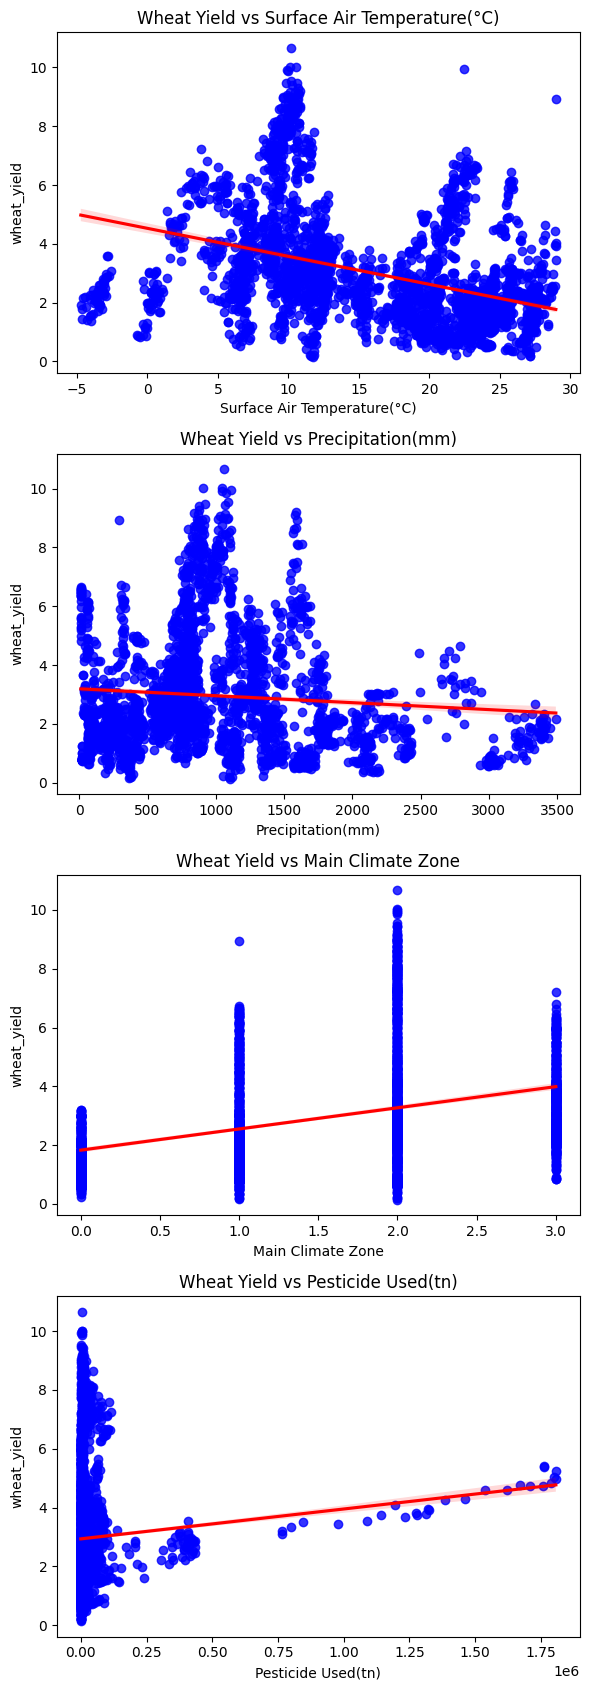

Random Forest - MSE: 0.31840650419980177, MAE: 0.3930376996084354, R²: 0.9166917144545208


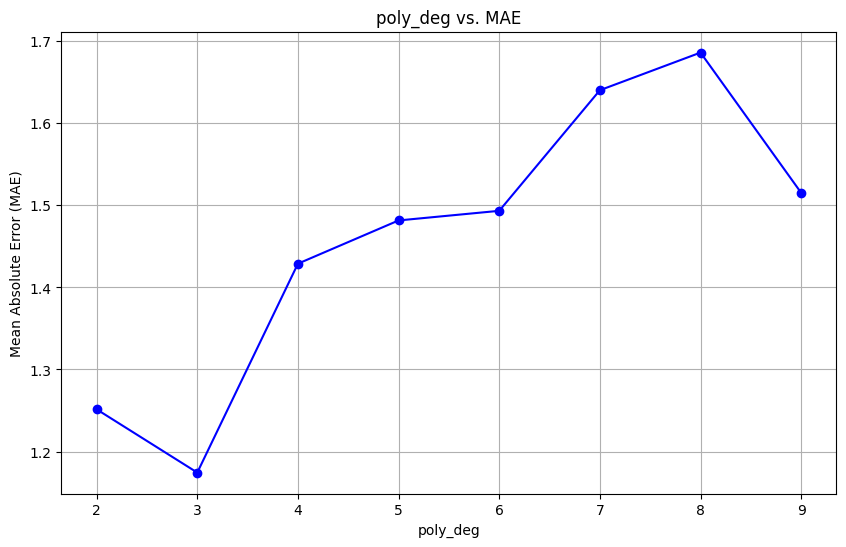

Optimal degree of polynomial of the polynomial regression is 3
Polynomial Regression Equation for wheat: wheat_yield = 1.33 + (-0.00 * Main Climate Zone) + (0.00 * Pesticide Used(tn)) + (-0.00 * Surface Air Temperature(°C)) + (-0.00 * Precipitation(mm)) + (0.00 * wheat_yield)
Polynomial Regression - MSE: 2.499505912371438, MAE: 1.1744226754684677, R²: 0.3460260719429644
Gradient Boosting - MSE: 0.7902278631026479, MAE: 0.6900172593131593, R²: 0.7932437698444784


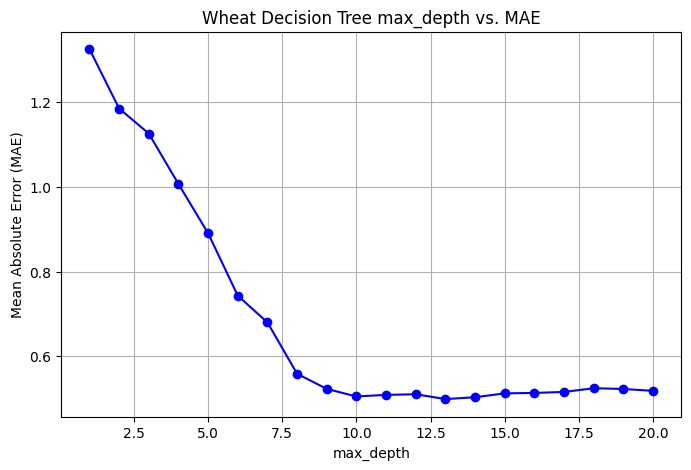

Optimal max depth of the decision tree for wheat is 13
Decision Tree - MSE: 0.6686080785876295, MAE: 0.5040442807157621, R²: 0.8250645260247572


In [89]:
# Wheat
lr_wheat, mse_lr_wheat, mae_lr_wheat, r2_lr_wheat = train_linear_regression(X_wheat_train, y_wheat_train, X_wheat_test, y_wheat_test, wheat_model_df, 'wheat', 'wheat_yield')
rf_wheat, mse_rf_wheat, mae_rf_wheat, r2_rf_wheat = train_random_forest(X_wheat_train, y_wheat_train, X_wheat_test, y_wheat_test)
poly_wheat, mse_poly_wheat, mae_poly_wheat, r2_poly_wheat = train_polynomial_regression(X_wheat_train, y_wheat_train, X_wheat_test, y_wheat_test, wheat_model_df, 'wheat')
gb_wheat, mse_gb_wheat, mae_gb_wheat, r2_gb_wheat = train_gradient_boosting(X_wheat_train, y_wheat_train, X_wheat_test, y_wheat_test)
dtr_wheat, mse_dtr_wheat, mae_dtr_wheat, r2_dtr_wheat = train_decision_tree(X_wheat_train, y_wheat_train, X_wheat_test, y_wheat_test, 'wheat')

## Cross Validation and Evaluation
1. Cross validation to assess the generalization ability of the models
2. Comparison of performamce of each model on the crops selected respectively

In [93]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

scoring = {
    'MSE': make_scorer(mean_squared_error),
    'MAE': make_scorer(mean_absolute_error),
    'R2': make_scorer(r2_score)
}

### Pulses

In [94]:
cv_results_lr_pulses = cross_validate(lr_pulses, X_pulses_train, y_pulses_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_rf_pulses = cross_validate(rf_pulses, X_pulses_train, y_pulses_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_poly_pulses = cross_validate(poly_pulses, X_pulses_train, y_pulses_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_gb_pulses = cross_validate(gb_pulses, X_pulses_train, y_pulses_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_dtr_pulses = cross_validate(dtr_pulses, X_pulses_train, y_pulses_train, cv=5, scoring=scoring, return_train_score=False)

print('Pulses Yield Prediction:')
# Linear Regression
print(f'Linear Regression - MSE: {mse_lr_pulses}, MAE: {mae_lr_pulses}, R²: {r2_lr_pulses}')
print(f'CV Linear Regression - MSE: {cv_results_lr_pulses["test_MSE"].mean()}, MAE: {cv_results_lr_pulses["test_MAE"].mean()}, R²: {cv_results_lr_pulses["test_R2"].mean()}')
print('')
# Random Forest
print(f'Random Forest - MSE: {mse_rf_pulses}, MAE: {mae_rf_pulses}, R²: {r2_rf_pulses}')
print(f'CV Random Forest - MSE: {cv_results_rf_pulses["test_MSE"].mean()}, MAE: {cv_results_rf_pulses["test_MAE"].mean()}, R²: {cv_results_rf_pulses["test_R2"].mean()}')
print('')
# Polynomial Regression
print(f'Polynomial Regression - MSE: {mse_poly_pulses}, MAE: {mae_poly_pulses}, R²: {r2_poly_pulses}')
print(f'CV Polynomial Regression - MSE: {cv_results_poly_pulses["test_MSE"].mean()}, MAE: {cv_results_poly_pulses["test_MAE"].mean()}, R²: {cv_results_poly_pulses["test_R2"].mean()}')
print('')
# Gradient Boosting
print(f'Gradient Boosting - MSE: {mse_gb_pulses}, MAE: {mae_gb_pulses}, R²: {r2_gb_pulses}')
print(f'CV Gradient Boosting - MSE: {cv_results_gb_pulses["test_MSE"].mean()}, MAE: {cv_results_gb_pulses["test_MAE"].mean()}, R²: {cv_results_gb_pulses["test_R2"].mean()}')
print('')
# Decision Tree
print(f'Decision Tree - MSE: {mse_dtr_pulses}, MAE: {mae_dtr_pulses}, R²: {r2_dtr_pulses}')
print(f'CV Decision Tree - MSE: {cv_results_dtr_pulses["test_MSE"].mean()}, MAE: {cv_results_dtr_pulses["test_MAE"].mean()}, R²: {cv_results_dtr_pulses["test_R2"].mean()}')

Pulses Yield Prediction:
Linear Regression - MSE: 23.89485139364762, MAE: 0.8351920267383635, R²: 0.0073532977687553736
CV Linear Regression - MSE: 5.351154974530887, MAE: 0.6919682356750585, R²: 0.0824618167811844

Random Forest - MSE: 17.826722777584333, MAE: 0.4314627943134335, R²: 0.2594372199584368
CV Random Forest - MSE: 3.245704400081055, MAE: 0.3249974565182258, R²: 0.5633718563587319

Polynomial Regression - MSE: 23.26492664292309, MAE: 0.8134535825102766, R²: 0.03352181064876336
CV Polynomial Regression - MSE: 5.351154974530887, MAE: 0.6919682356750585, R²: 0.0824618167811844

Gradient Boosting - MSE: 17.623048815644, MAE: 0.597835978863802, R²: 0.2678983015244929
CV Gradient Boosting - MSE: 3.6686810601750524, MAE: 0.47135589124962163, R²: 0.4961366875521419

Decision Tree - MSE: 19.20617798516989, MAE: 0.5386241273761228, R²: 0.20213149998858815
CV Decision Tree - MSE: 4.774143705582446, MAE: 0.37110642615481026, R²: 0.31678885911314963


### Maize

In [95]:
cv_results_lr_maize = cross_validate(lr_maize, X_maize_train, y_maize_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_rf_maize = cross_validate(rf_maize, X_maize_train, y_maize_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_poly_maize = cross_validate(poly_maize, X_maize_train, y_maize_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_gb_maize = cross_validate(gb_maize, X_maize_train, y_maize_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_dtr_maize = cross_validate(dtr_maize, X_maize, y_maize, cv=10, scoring=scoring, return_train_score=False)

# Linear Regression
print(f'Linear Regression - MSE: {mse_lr_maize}, MAE: {mae_lr_maize}, R²: {r2_lr_maize}')
print(f'CV Linear Regression - MSE: {cv_results_lr_maize["test_MSE"].mean()}, MAE: {cv_results_lr_maize["test_MAE"].mean()}, R²: {cv_results_lr_maize["test_R2"].mean()}')
print('')
# Random Forest
print(f'Random Forest - MSE: {mse_rf_maize}, MAE: {mae_rf_maize}, R²: {r2_rf_maize}')
print(f'CV Random Forest - MSE: {cv_results_rf_maize["test_MSE"].mean()}, MAE: {cv_results_rf_maize["test_MAE"].mean()}, R²: {cv_results_rf_maize["test_R2"].mean()}')
print('')
# Polynomial Regression
print(f'Polynomial Regression - MSE: {mse_poly_maize}, MAE: {mae_poly_maize}, R²: {r2_poly_maize}')
print(f'CV Polynomial Regression - MSE: {cv_results_poly_maize["test_MSE"].mean()}, MAE: {cv_results_poly_maize["test_MAE"].mean()}, R²: {cv_results_poly_maize["test_R2"].mean()}')
print('')
# Gradient Boosting
print(f'Gradient Boosting - MSE: {mse_gb_maize}, MAE: {mae_gb_maize}, R²: {r2_gb_maize}')
print(f'CV Gradient Boosting - MSE: {cv_results_gb_maize["test_MSE"].mean()}, MAE: {cv_results_gb_maize["test_MAE"].mean()}, R²: {cv_results_gb_maize["test_R2"].mean()}')
print('')
# Decision Tree
print(f'Decision Tree - MSE: {mse_dtr_maize}, MAE: {mae_dtr_maize}, R²: {r2_dtr_maize}')
print(f'CV Decision Tree - MSE: {cv_results_dtr_maize["test_MSE"].mean()}, MAE: {cv_results_dtr_maize["test_MAE"].mean()}, R²: {cv_results_dtr_maize["test_R2"].mean()}')

Linear Regression - MSE: 8.576323889636718, MAE: 2.1187211995425597, R²: 0.1780430950258568
CV Linear Regression - MSE: 10.246478856407503, MAE: 2.145852354201546, R²: 0.1740252887614409

Random Forest - MSE: 1.4122074241284468, MAE: 0.6293037633968364, R²: 0.8646537072928464
CV Random Forest - MSE: 2.113615678251701, MAE: 0.6968159076819616, R²: 0.8314752505414568

Polynomial Regression - MSE: 6.856751737819637, MAE: 1.803386389819205, R²: 0.3428472957505061
CV Polynomial Regression - MSE: 10.246478856407503, MAE: 2.145852354201546, R²: 0.1740252887614409

Gradient Boosting - MSE: 3.2889083258921676, MAE: 1.1616361699792113, R²: 0.684790250102305
CV Gradient Boosting - MSE: 3.7321247675651867, MAE: 1.1975812716878576, R²: 0.6995877860601383

Decision Tree - MSE: 2.659792775975517, MAE: 0.7432962613361697, R²: 0.7450848328320274
CV Decision Tree - MSE: 23.97397753769168, MAE: 2.711064588532502, R²: -1.8218957600532266


### Sugar Crops

In [96]:
cv_results_lr_sugar_crops = cross_validate(lr_sugar_crops, X_sugar_crops_train, y_sugar_crops_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_rf_sugar_crops = cross_validate(rf_sugar_crops, X_sugar_crops_train, y_sugar_crops_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_poly_sugar_crops = cross_validate(poly_sugar_crops, X_sugar_crops_train, y_sugar_crops_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_gb_sugar_crops = cross_validate(gb_sugar_crops, X_sugar_crops_train, y_sugar_crops_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_dtr_sugar_crops = cross_validate(dtr_sugar_crops, X_sugar_crops_train, y_sugar_crops_train, cv=5, scoring=scoring, return_train_score=False)

print(f'\nSugar Crops:')
print(f'Linear Regression - MSE: {mse_lr_sugar_crops}, MAE: {mae_lr_sugar_crops}, R²: {r2_lr_sugar_crops}')
print(f'CV Linear Regression - MSE: {cv_results_lr_sugar_crops["test_MSE"].mean()}, MAE: {cv_results_lr_sugar_crops["test_MAE"].mean()}, R²: {cv_results_lr_sugar_crops["test_R2"].mean()}')
print(f'Random Forest - MSE: {mse_rf_sugar_crops}, MAE: {mae_rf_sugar_crops}, R²: {r2_rf_sugar_crops}')
print(f'CV Random Forest - MSE: {cv_results_rf_sugar_crops["test_MSE"].mean()}, MAE: {cv_results_rf_sugar_crops["test_MAE"].mean()}, R²: {cv_results_rf_sugar_crops["test_R2"].mean()}')
print(f'Polynomial Regression - MSE: {mse_poly_sugar_crops}, MAE: {mae_poly_sugar_crops}, R²: {r2_poly_sugar_crops}')
print(f'CV Polynomial Regression - MSE: {cv_results_poly_sugar_crops["test_MSE"].mean()}, MAE: {cv_results_poly_sugar_crops["test_MAE"].mean()}, R²: {cv_results_poly_sugar_crops["test_R2"].mean()}')
print(f'Gradient Boosting - MSE: {mse_gb_sugar_crops}, MAE: {mae_gb_sugar_crops}, R²: {r2_gb_sugar_crops}')
print(f'CV Gradient Boosting - MSE: {cv_results_gb_sugar_crops["test_MSE"].mean()}, MAE: {cv_results_gb_sugar_crops["test_MAE"].mean()}, R²: {cv_results_gb_sugar_crops["test_R2"].mean()}')
print(f'Decision Tree - MSE: {mse_dtr_sugar_crops}, MAE: {mae_dtr_sugar_crops}, R²: {r2_dtr_sugar_crops}')
print(f'CV Decision Tree - MSE: {cv_results_dtr_sugar_crops["test_MSE"].mean()}, MAE: {cv_results_dtr_sugar_crops["test_MAE"].mean()}, R²: {cv_results_dtr_sugar_crops["test_R2"].mean()}')


Sugar Crops:
Linear Regression - MSE: 542.6209299323433, MAE: 18.391582008294478, R²: 0.1089622529977261
CV Linear Regression - MSE: 584.4591616569945, MAE: 19.230812515195883, R²: 0.07288188356299734
Random Forest - MSE: 70.90639298238071, MAE: 5.706355956936144, R²: 0.8835646228040707
CV Random Forest - MSE: 75.97128575569297, MAE: 6.041635445374005, R²: 0.8796196871415619
Polynomial Regression - MSE: 473.64851721772277, MAE: 16.983906624682188, R²: 0.22222184148836777
CV Polynomial Regression - MSE: 584.4591616569945, MAE: 19.230812515195883, R²: 0.07288188356299734
Gradient Boosting - MSE: 186.67085036847124, MAE: 10.64558491327921, R²: 0.6934678248329637
CV Gradient Boosting - MSE: 213.1240527950753, MAE: 11.224613705076418, R²: 0.662166018992761
Decision Tree - MSE: 115.7196831849588, MAE: 6.597503303348384, R²: 0.809976725737802
CV Decision Tree - MSE: 130.94388534964224, MAE: 7.2517749930180555, R²: 0.7921210158310492


### Tobacco

In [97]:
cv_results_lr_tobacco = cross_validate(lr_tobacco, X_tobacco_train, y_tobacco_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_rf_tobacco = cross_validate(rf_tobacco, X_tobacco_train, y_tobacco_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_poly_tobacco = cross_validate(poly_tobacco, X_tobacco_train, y_tobacco_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_gb_tobacco = cross_validate(gb_tobacco, X_tobacco_train, y_tobacco_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_dtr_tobacco = cross_validate(dtr_tobacco, X_tobacco, y_tobacco, cv=10, scoring=scoring, return_train_score=False)

print(f'\nTobacco:')
print(f'Linear Regression - MSE: {mse_lr_tobacco}, MAE: {mae_lr_tobacco}, R²: {r2_lr_tobacco}')
print(f'CV Linear Regression - MSE: {cv_results_lr_tobacco["test_MSE"].mean()}, MAE: {cv_results_lr_tobacco["test_MAE"].mean()}, R²: {cv_results_lr_tobacco["test_R2"].mean()}')
print(f'Random Forest - MSE: {mse_rf_tobacco}, MAE: {mae_rf_tobacco}, R²: {r2_rf_tobacco}')
print(f'CV Random Forest - MSE: {cv_results_rf_tobacco["test_MSE"].mean()}, MAE: {cv_results_rf_tobacco["test_MAE"].mean()}, R²: {cv_results_rf_tobacco["test_R2"].mean()}')
print(f'Polynomial Regression - MSE: {mse_poly_tobacco}, MAE: {mae_poly_tobacco}, R²: {r2_poly_tobacco}')
print(f'CV Polynomial Regression - MSE: {cv_results_poly_tobacco["test_MSE"].mean()}, MAE: {cv_results_poly_tobacco["test_MAE"].mean()}, R²: {cv_results_poly_tobacco["test_R2"].mean()}')
print(f'Gradient Boosting - MSE: {mse_gb_tobacco}, MAE: {mae_gb_tobacco}, R²: {r2_gb_tobacco}')
print(f'CV Gradient Boosting - MSE: {cv_results_gb_tobacco["test_MSE"].mean()}, MAE: {cv_results_gb_tobacco["test_MAE"].mean()}, R²: {cv_results_gb_tobacco["test_R2"].mean()}')
print(f'Decision Tree - MSE: {mse_dtr_tobacco}, MAE: {mae_dtr_tobacco}, R²: {r2_dtr_tobacco}')
print(f'CV Decision Tree - MSE: {cv_results_dtr_tobacco["test_MSE"].mean()}, MAE: {cv_results_dtr_tobacco["test_MAE"].mean()}, R²: {cv_results_dtr_tobacco["test_R2"].mean()}')



Tobacco:
Linear Regression - MSE: 0.9776375359367823, MAE: 0.6881556217366742, R²: 0.02526096147633261
CV Linear Regression - MSE: 1.0147398201270095, MAE: 0.683266577342595, R²: 0.02776813793747801
Random Forest - MSE: 0.19329137475959937, MAE: 0.23897002006718668, R²: 0.8072816950429847
CV Random Forest - MSE: 0.21223426824922345, MAE: 0.24765348573618376, R²: 0.7884937773311271
Polynomial Regression - MSE: 0.8952401780441568, MAE: 0.6547026886120468, R²: 0.10741402788063004
CV Polynomial Regression - MSE: 1.0147398201270095, MAE: 0.683266577342595, R²: 0.02776813793747801
Gradient Boosting - MSE: 0.4191481138363313, MAE: 0.3875696760314966, R²: 0.582094575482571
CV Gradient Boosting - MSE: 0.41246473217094276, MAE: 0.40323338525623154, R²: 0.595309847895698
Decision Tree - MSE: 0.23621555998243557, MAE: 0.27106447709199294, R²: 0.7644847713411674
CV Decision Tree - MSE: 1.640564100869124, MAE: 0.8663249069505037, R²: -0.8874358753335967


### Rice

In [98]:
cv_results_lr_rice = cross_validate(lr_rice, X_rice_train, y_rice_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_rf_rice = cross_validate(rf_rice, X_rice_train, y_rice_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_poly_rice = cross_validate(poly_rice, X_rice_train, y_rice_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_gb_rice = cross_validate(gb_rice, X_rice_train, y_rice_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_dtr_rice = cross_validate(dtr_rice, X_rice, y_rice, cv=10, scoring=scoring, return_train_score=False)

print(f'\nRice:')
print(f'Linear Regression - MSE: {mse_lr_rice}, MAE: {mae_lr_rice}, R²: {r2_lr_rice}')
print(f'CV Linear Regression - MSE: {cv_results_lr_rice["test_MSE"].mean()}, MAE: {cv_results_lr_rice["test_MAE"].mean()}, R²: {cv_results_lr_rice["test_R2"].mean()}')
print(f'Random Forest - MSE: {mse_rf_rice}, MAE: {mae_rf_rice}, R²: {r2_rf_rice}')
print(f'CV Random Forest - MSE: {cv_results_rf_rice["test_MSE"].mean()}, MAE: {cv_results_rf_rice["test_MAE"].mean()}, R²: {cv_results_rf_rice["test_R2"].mean()}')
print(f'Polynomial Regression - MSE: {mse_poly_rice}, MAE: {mae_poly_rice}, R²: {r2_poly_rice}')
print(f'CV Polynomial Regression - MSE: {cv_results_poly_rice["test_MSE"].mean()}, MAE: {cv_results_poly_rice["test_MAE"].mean()}, R²: {cv_results_poly_rice["test_R2"].mean()}')
print(f'Gradient Boosting - MSE: {mse_gb_rice}, MAE: {mae_gb_rice}, R²: {r2_gb_rice}')
print(f'CV Gradient Boosting - MSE: {cv_results_gb_rice["test_MSE"].mean()}, MAE: {cv_results_gb_rice["test_MAE"].mean()}, R²: {cv_results_gb_rice["test_R2"].mean()}')
print(f'Decision Tree - MSE: {mse_dtr_rice}, MAE: {mae_dtr_rice}, R²: {r2_dtr_rice}')
print(f'CV Decision Tree - MSE: {cv_results_dtr_rice["test_MSE"].mean()}, MAE: {cv_results_dtr_rice["test_MAE"].mean()}, R²: {cv_results_dtr_rice["test_R2"].mean()}')



Rice:
Linear Regression - MSE: 3.2649881654128863, MAE: 1.4446095804368422, R²: 0.16910384472700057
CV Linear Regression - MSE: 3.24717179959577, MAE: 1.43495638333269, R²: 0.17019178610147107
Random Forest - MSE: 0.4218549988816167, MAE: 0.44117750048409077, R²: 0.8926435016314662
CV Random Forest - MSE: 0.4968735132260827, MAE: 0.46552183730277774, R²: 0.873251367008429
Polynomial Regression - MSE: 2.6692396837505217, MAE: 1.2718420778154875, R²: 0.3207139265541694
CV Polynomial Regression - MSE: 3.24717179959577, MAE: 1.43495638333269, R²: 0.17019178610147107
Gradient Boosting - MSE: 1.048637658905303, MAE: 0.7895728094481734, R²: 0.7331356332960213
CV Gradient Boosting - MSE: 0.9767675548486089, MAE: 0.7610841656274977, R²: 0.7504986037365625
Decision Tree - MSE: 0.6426605837306287, MAE: 0.4924543498998246, R²: 0.8364514108124634
CV Decision Tree - MSE: 4.781984473959313, MAE: 1.558120063500414, R²: -0.4247814055767239


### Wheat

In [99]:
cv_results_lr_wheat = cross_validate(lr_wheat, X_wheat_train, y_wheat_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_rf_wheat = cross_validate(rf_wheat, X_wheat_train, y_wheat_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_poly_wheat = cross_validate(poly_wheat, X_wheat_train, y_wheat_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_gb_wheat = cross_validate(gb_wheat, X_wheat_train, y_wheat_train, cv=5, scoring=scoring, return_train_score=False)
cv_results_dtr_wheat = cross_validate(dtr_wheat, X_wheat, y_wheat, cv=10, scoring=scoring, return_train_score=False)

print(f'\nWheat:')
print(f'Linear Regression - MSE: {mse_lr_wheat}, MAE: {mae_lr_wheat}, R²: {r2_lr_wheat}')
print(f'CV Linear Regression - MSE: {cv_results_lr_wheat["test_MSE"].mean()}, MAE: {cv_results_lr_wheat["test_MAE"].mean()}, R²: {cv_results_lr_wheat["test_R2"].mean()}')
print(f'Random Forest - MSE: {mse_rf_wheat}, MAE: {mae_rf_wheat}, R²: {r2_rf_wheat}')
print(f'CV Random Forest - MSE: {cv_results_rf_wheat["test_MSE"].mean()}, MAE: {cv_results_rf_wheat["test_MAE"].mean()}, R²: {cv_results_rf_wheat["test_R2"].mean()}')
print(f'Polynomial Regression - MSE: {mse_poly_wheat}, MAE: {mae_poly_wheat}, R²: {r2_poly_wheat}')
print(f'CV Polynomial Regression - MSE: {cv_results_poly_wheat["test_MSE"].mean()}, MAE: {cv_results_poly_wheat["test_MAE"].mean()}, R²: {cv_results_poly_wheat["test_R2"].mean()}')
print(f'Gradient Boosting - MSE: {mse_gb_wheat}, MAE: {mae_gb_wheat}, R²: {r2_gb_wheat}')
print(f'CV Gradient Boosting - MSE: {cv_results_gb_wheat["test_MSE"].mean()}, MAE: {cv_results_gb_wheat["test_MAE"].mean()}, R²: {cv_results_gb_wheat["test_R2"].mean()}')
print(f'Decision Tree - MSE: {mse_dtr_wheat}, MAE: {mae_dtr_wheat}, R²: {r2_dtr_wheat}')
print(f'CV Decision Tree - MSE: {cv_results_dtr_wheat["test_MSE"].mean()}, MAE: {cv_results_dtr_wheat["test_MAE"].mean()}, R²: {cv_results_dtr_wheat["test_R2"].mean()}')



Wheat:
Linear Regression - MSE: 3.182144206987801, MAE: 1.3204031975315573, R²: 0.16741971427731472
CV Linear Regression - MSE: 3.080736538464719, MAE: 1.3021134588490013, R²: 0.1580781638857496
Random Forest - MSE: 0.31840650419980177, MAE: 0.3930376996084354, R²: 0.9166917144545208
CV Random Forest - MSE: 0.40220114465933854, MAE: 0.425154970437708, R²: 0.890949980018964
Polynomial Regression - MSE: 2.499505912371438, MAE: 1.1744226754684677, R²: 0.3460260719429644
CV Polynomial Regression - MSE: 3.080736538464719, MAE: 1.3021134588490013, R²: 0.1580781638857496
Gradient Boosting - MSE: 0.7902278631026479, MAE: 0.6900172593131593, R²: 0.7932437698444784
CV Gradient Boosting - MSE: 0.8766755758438836, MAE: 0.7054850337504436, R²: 0.760668257092629
Decision Tree - MSE: 0.6686080785876295, MAE: 0.5040442807157621, R²: 0.8250645260247572
CV Decision Tree - MSE: 4.306152570265801, MAE: 1.5048484648004308, R²: -0.4894854144372546
